In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import os
print(os.getcwd())  # Esto imprime el directorio actual

c:\Users\rey_d\Documents\GitHub\An-lisis-de-inversion-inmobiliario\notebooks


In [3]:
import os

# Cambiar el directorio de trabajo al nivel superior
os.chdir('..')

# Verificar dónde estás ahora
print("Directorio actual:", os.getcwd())

Directorio actual: c:\Users\rey_d\Documents\GitHub\An-lisis-de-inversion-inmobiliario


In [4]:
df = pd.read_csv('data/Valencia_limpio.csv', sep=',')
df.head(2)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,days_rented
0,922483078848880362,https://www.airbnb.com/rooms/922483078848880362,20250315152909,2025-03-15,city scrape,piso acogedor,This place has a strategic location: a 5-minut...,Sin información,https://a0.muscache.com/pictures/7ace9e77-5619...,20512920,...,4.56,Sin datos,f,1,1,0,0,0.46,Valencia,288
1,968111902707427537,https://www.airbnb.com/rooms/968111902707427537,20250315152909,2025-03-16,city scrape,#2 Soho By The Sea. Beach studio,Welcome to our unique studio in the heart of C...,Sin información,https://a0.muscache.com/pictures/9fe7cdd9-2ad9...,512484841,...,4.67,Sin datos,f,5,5,0,0,1.60,Valencia,185


In [5]:
df_delincuencia = pd.read_csv('data/crimenValencia.csv', sep=';')
df_delincuencia.head(2)

,Año,Parámetro,Denuncias
0,2023,Agresión sexual con penetración,14.0
1,2023,Homicidios dolosos y asesinatos consumados,2.0


In [6]:
df_inmobiliario = pd.read_csv('data/valencia_vivienda_limpio.csv', sep=',')
df_inmobiliario.head(2)

,"neighbourhood_cleansed;""Precio Valencia"""
0,"RUSSAFA;""3900.00"""
1,"CABANYAL-CANYAMELAR;""2100.00"""


### EDA

In [ ]:
#CALCULAR ROI DE PROPIEDADES EN VALENCIA
# Separar la columna combinada en dos columnas
df_inmobiliario[['neighbourhood', 'Precio Valencia']] = df_inmobiliario['neighbourhood;"Precio Valencia"'].str.split(';', expand=True)
df_inmobiliario['Precio Valencia'] = df_inmobiliario['Precio Valencia'].str.replace('"', '').str.replace(',', '').astype(float)

# Limpiar columna de price en listings si existe
if 'price' in df.columns:
    df['price'] = df['price'].astype(float)
else:
    print("⚠️ La columna 'price' no se encuentra en Valencia_limpio.csv")

# Calcular ingreso anual estimado por propiedad
df['annual_income'] = df['price'] * df['days_rented']

# Obtener precio medio por m² en Valencia (último año disponible)
precio_m2_valencia = df_inmobiliario['Precio Valencia'].mean()

# Suposición: tamaño promedio de vivienda
average_m2 = 70
df['estimated_property_value'] = precio_m2_valencia * average_m2

# Calcular ROI bruto
df['ROI (%)'] = (df['annual_income'] / df['estimated_property_value']) * 100

# Calcular ROI neto con gastos estimados
gastos_anuales = 3000
df['net_annual_income'] = df['annual_income'] - gastos_anuales
df['Net ROI (%)'] = (df['net_annual_income'] / df['estimated_property_value']) * 100

# Mostrar resultados
print(df[['name', 'price', 'days_rented', 'annual_income', 'estimated_property_value', 'ROI (%)', 'Net ROI (%)']].head())


                                  name  price  days_rented  annual_income  \
0                        piso acogedor  143.0          288        41184.0   
1     #2 Soho By The Sea. Beach studio  109.0          185        20165.0   
2  #3 Soho By The Sea. Beach apartment  120.0          193        23160.0   
3     #1 Soho By The Sea. Beach studio  109.0          193        21037.0   
4     Beach, Sun＆Fun  in Valencia 3bdr  134.0           49         6566.0   

   estimated_property_value    ROI (%)  Net ROI (%)  
0                  163352.0  25.211813    23.375288  
1                  163352.0  12.344508    10.507983  
2                  163352.0  14.177971    12.341447  
3                  163352.0  12.878324    11.041799  
4                  163352.0   4.019541     2.183016  


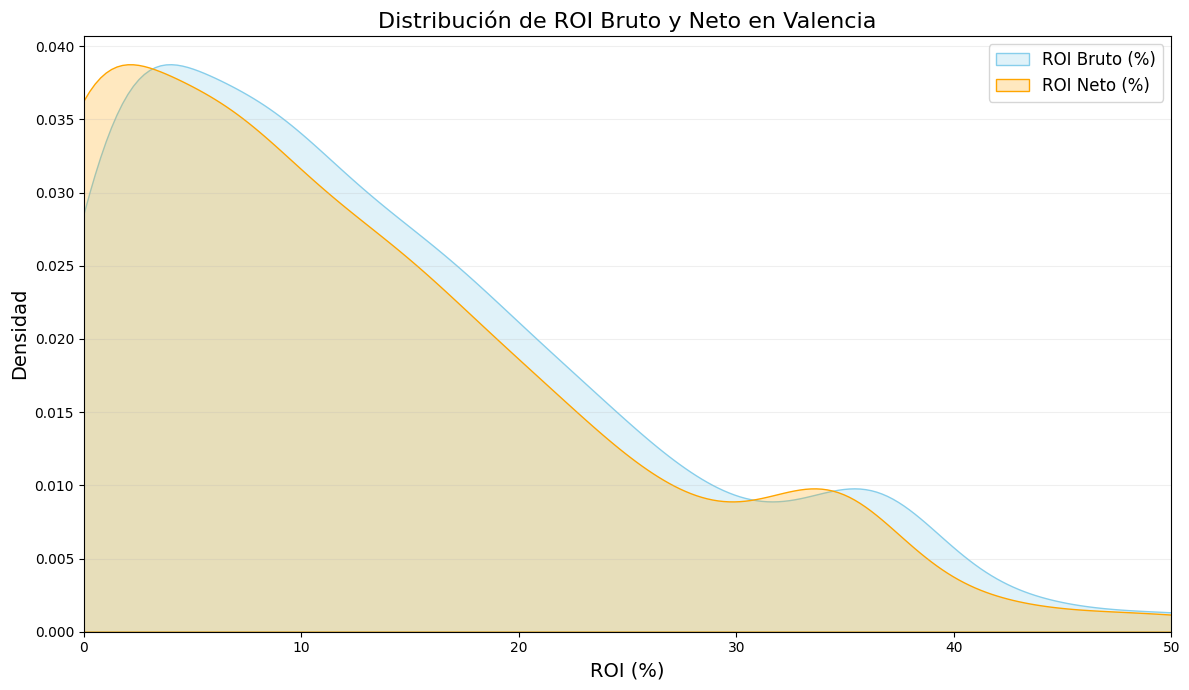

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.kdeplot(df['ROI (%)'], fill=True, label='ROI Bruto (%)', color='skyblue', bw_adjust=0.7, clip=(0, 50))
sns.kdeplot(df['Net ROI (%)'], fill=True, label='ROI Neto (%)', color='orange', bw_adjust=0.7, clip=(0, 50))
plt.title('Distribución de ROI Bruto y Neto en Valencia', fontsize=16)
plt.xlabel('ROI (%)', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.xlim(0, 50)
plt.legend(fontsize=12)
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()


📊 Conclusión sobre la Distribución del ROI Bruto y Neto en Valencia

El gráfico muestra la distribución de densidad del ROI Bruto (en azul claro) y el ROI Neto (en naranja) de propiedades en alquiler en Valencia. Las curvas reflejan la frecuencia relativa de distintas tasas de retorno en el conjunto de datos.
✅ Principales observaciones:

- ROI promedio moderado:
La mayor densidad de propiedades se concentra entre el 8% y el 20% de ROI, lo que indica que la mayoría de las viviendas generan retornos en ese rango.

Diferencia entre bruto y neto es consistente:
La diferencia entre ROI bruto y neto es visible pero relativamente pequeña y uniforme. Esto sugiere que los gastos estimados (como mantenimiento, impuestos, etc.) no alteran drásticamente la rentabilidad para la mayoría de las propiedades. Gastos fijos anuales de 3000€.

- ROI alto es menos frecuente:
Propiedades con un ROI superior al 30% son menos comunes, lo cual es lógico, ya que generalmente implican un mayor riesgo, precios de adquisición más bajos o una ocupación muy alta.

El ROI neto sigue de cerca al bruto:
Esto indica que, aunque los costos afectan la rentabilidad, las propiedades en Valencia pueden seguir siendo rentables incluso después de considerar los gastos operativos.

🧠 Interpretación general:

Invertir en propiedades de alquiler en Valencia ofrece un retorno razonable, con la mayoría de los inmuebles generando entre un 8% y un 20% anual neto, lo cual es competitivo frente a otros tipos de inversión. Además, la diferencia estrecha entre ROI bruto y neto sugiere una estructura de costos operativos bastante estable o eficiente.

In [ ]:
# ROI por barrio
# Agrupar por barrio y calcular el promedio de ROI bruto y neto
roi_por_barrio = df.groupby('neighbourhood')[['ROI (%)', 'Net ROI (%)']].mean().sort_values(by='Net ROI (%)', ascending=False)

# Mostrar los barrios con mayor ROI neto
print(roi_por_barrio.head(10))

                                        ROI (%)  Net ROI (%)
neighbourhood_cleansed                                      
CARPESA                               45.155554    43.319029
LA GRAN VIA                           30.316012    28.479487
EXPOSICIO                             23.905311    22.068786
EL MERCAT                             23.190362    21.353837
CIUTAT DE LES ARTS I DE LES CIENCIES  22.903266    21.066741
EL PILAR                              22.340960    20.504435
SANT FRANCESC                         21.832148    19.995623
EL CARME                              21.098211    19.261687
EL PLA DEL REMEI                      20.861381    19.024856
LA ROQUETA                            20.793643    18.957118


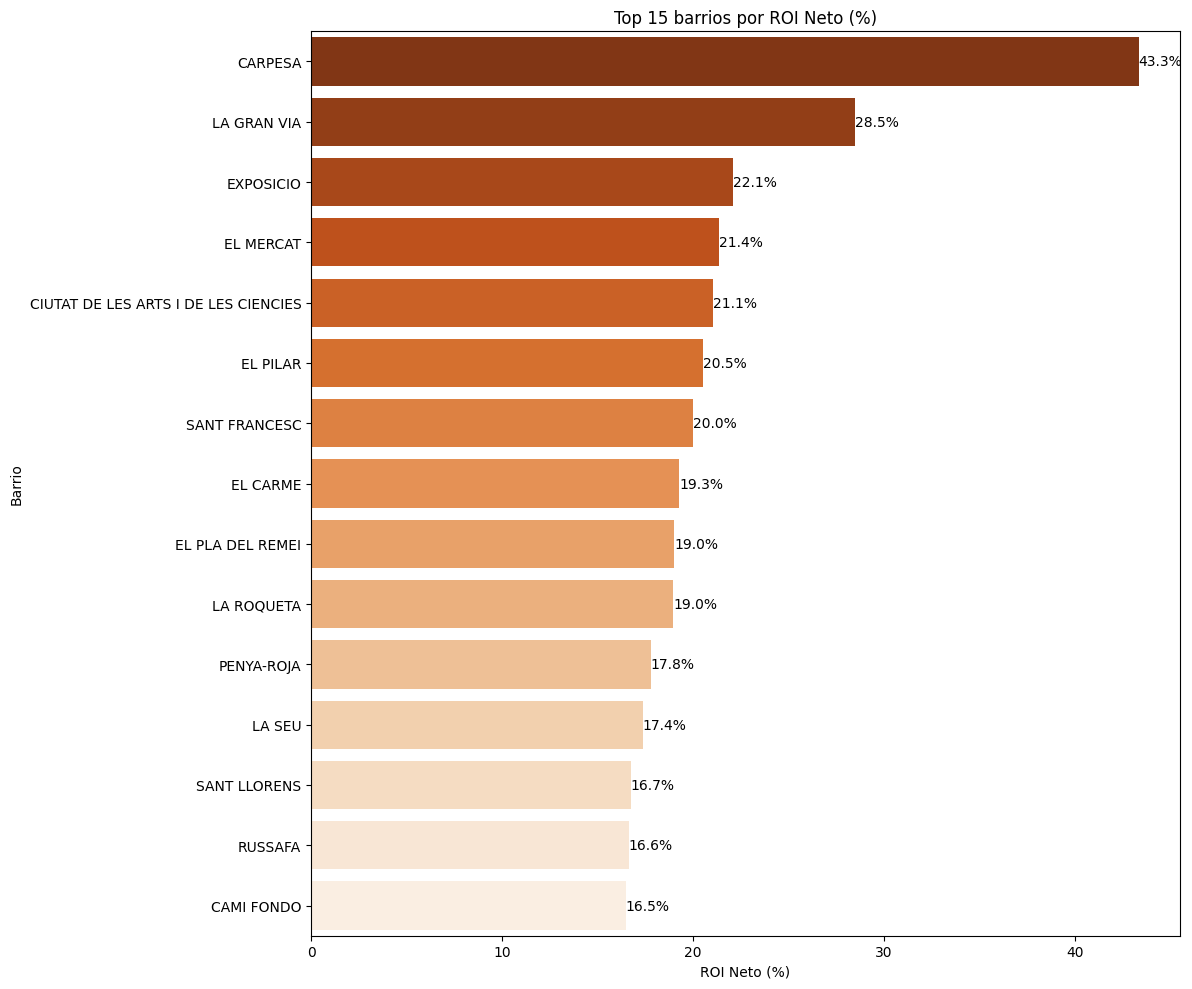

In [12]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(
    y=roi_por_barrio.index[:15], 
    x=roi_por_barrio['Net ROI (%)'][:15], 
    palette='Oranges_r'
)
plt.title("Top 15 barrios por ROI Neto (%)")
plt.xlabel("ROI Neto (%)")
plt.ylabel("Barrio")
plt.tight_layout()

# Añadir etiquetas de porcentaje en cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.show()

Conclusión: 

El gráfico muestra los 15 barrios de Valencia con mayor retorno neto de la inversión (ROI Neto) en alquileres turísticos. Se observa que existen diferencias significativas entre barrios, destacando especialmente CARPESA con un ROI neto muy superior al resto. Otros barrios céntricos y turísticos como LA GRAN VIA, EXPOSICIO y EL MERCAT también presentan retornos elevados, lo que sugiere que la ubicación sigue siendo un factor clave para la rentabilidad. En general, invertir en los barrios con mayor ROI neto puede ofrecer mejores oportunidades de rentabilidad, aunque es importante considerar otros factores como la demanda, la regulación y los posibles riesgos asociados a cada zona.

In [ ]:
# Calcular el precio óptimo por barrio por metro cuadrado
# 1. Limpiar precios
df['price'] = df['price'].replace('[\€,]', '', regex=True).astype(float)

# 2. Parámetros
average_m2 = 60  # Tamaño estimado de vivienda en metros cuadrados
rentabilidad_objetivo = 0.06  # Rentabilidad bruta mínima deseada (6%)

# 3. Agrupar por barrio y calcular estadísticas básicas
zona_stats = df.groupby('neighbourhood').agg({
    'price': 'mean',
    'review_scores_value': 'mean',
    'days_rented': 'mean'
}).reset_index()

# 4. Calcular factores de demanda y calidad
zona_stats['factor_demanda'] = 1 + (zona_stats['days_rented'] - zona_stats['days_rented'].mean()) / zona_stats['days_rented'].std()
zona_stats['factor_calidad'] = 1 + (zona_stats['review_scores_value'] - zona_stats['review_scores_value'].mean()) / 10

# 5. Estimar precio óptimo de alquiler por vivienda (mensual)
zona_stats['precio_optimo_alquiler'] = zona_stats['price'] * zona_stats['factor_demanda'] * zona_stats['factor_calidad']

# 6. Estimar ingreso anual por vivienda
zona_stats['ingreso_anual'] = zona_stats['precio_optimo_alquiler'] * zona_stats['days_rented']

# 7. Estimar precio óptimo de compra total
zona_stats['precio_compra_optimo'] = zona_stats['ingreso_anual'] / rentabilidad_objetivo

# 8. Estimar precio óptimo de compra por metro cuadrado
zona_stats['precio_compra_optimo_m2'] = zona_stats['precio_compra_optimo'] / average_m2

# 9. Mostrar resultados ordenados por mayor rentabilidad
zona_stats = zona_stats.sort_values(by='precio_compra_optimo_m2', ascending=False)

# 10. Mostrar resultados
print(zona_stats[['neighbourhood', 'precio_compra_optimo', 'precio_compra_optimo_m2']])



   neighbourhood_cleansed  precio_compra_optimo  precio_compra_optimo_m2
14                CARPESA          2.007794e+06             33463.234089
11             CAMI FONDO          1.880211e+06             31336.843373
69                 PINEDO          1.848400e+06             30806.664774
22               EL CARME          1.822703e+06             30378.386108
33              EXPOSICIO          1.738347e+06             28972.448922
..                    ...                   ...                      ...
23       EL FORN D'ALCEDO         -8.983769e+04             -1497.294869
12              CAMI REAL         -9.192179e+04             -1532.029858
4               BENIFERRI         -1.556885e+05             -2594.807747
34               FAITANAR         -1.739784e+05             -2899.640032
57    MAHUELLA-TAULADELLA         -2.028175e+05             -3380.291044

[85 rows x 3 columns]


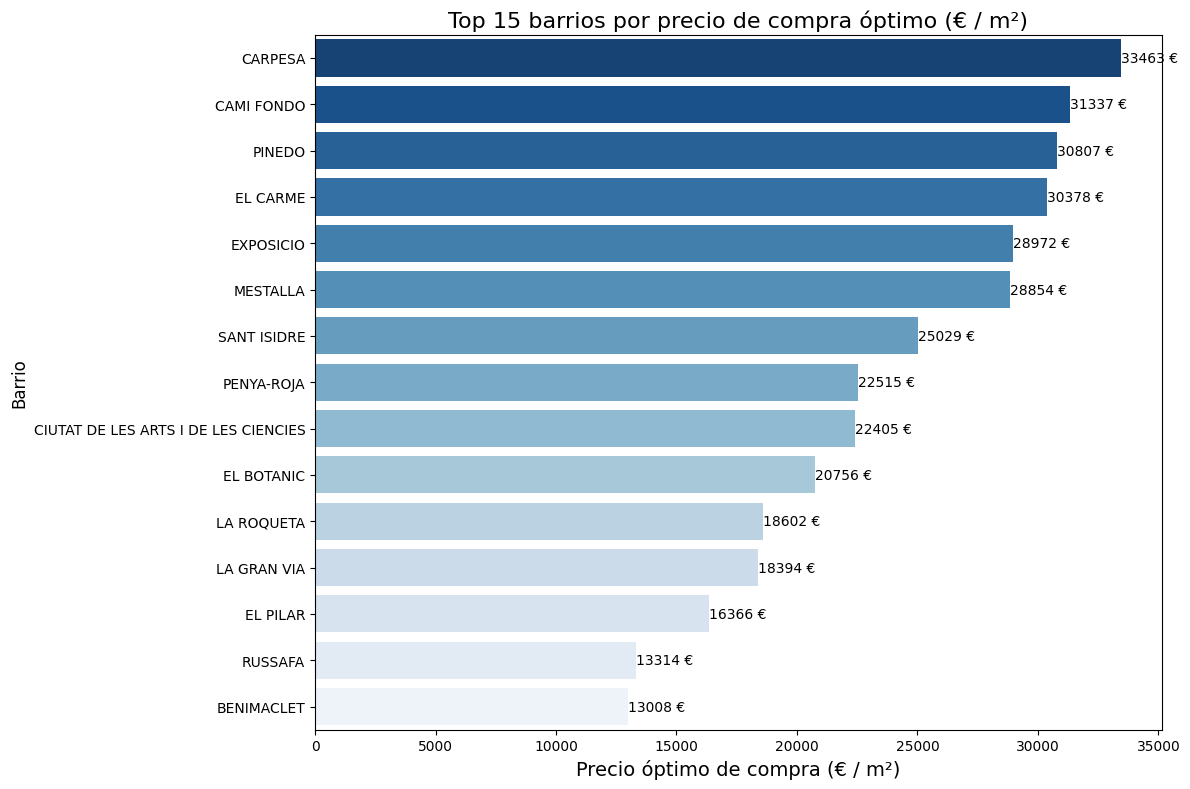

In [ ]:
#  Gráfico de los top 15 barrios por precio óptimo €/m²
top_zonas = zona_stats.head(15).copy()
top_zonas['neighbourhood'] = top_zonas['neighbourhood'].str.strip().str.replace('\n', '', regex=True)

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=top_zonas['neighbourhood'],
    x=top_zonas['precio_compra_optimo_m2'],
    palette='Blues_r'
)
plt.title("Top 15 barrios por precio de compra óptimo (€ / m²)", fontsize=16)
plt.xlabel("Precio óptimo de compra (€ / m²)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.yticks(fontsize=10)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f €')

plt.show()

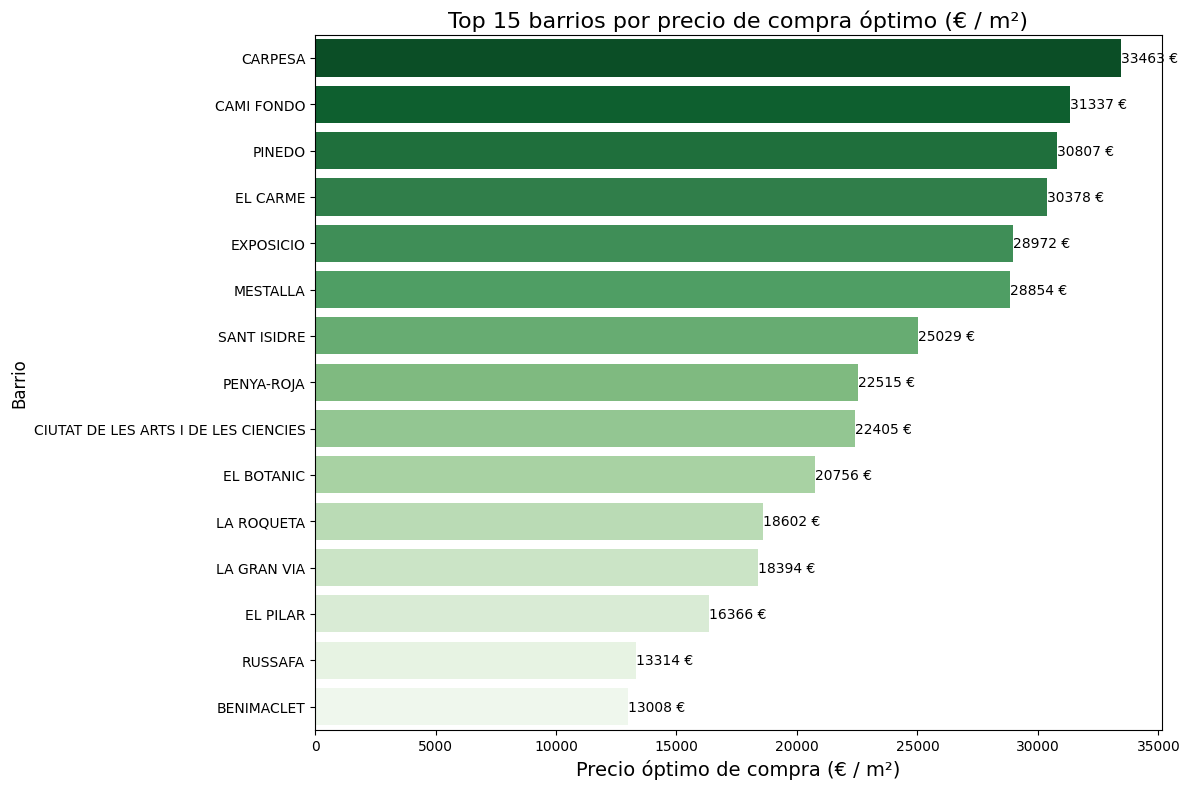

In [ ]:
top_zonas_rent = zona_stats.head(15)

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=top_zonas_rent['neighbourhood'],
    x=top_zonas_rent['precio_compra_optimo_m2'],
    palette='Greens_r'
)
plt.title("Top 15 barrios por precio de compra óptimo (€ / m²)", fontsize=16)
plt.xlabel("Precio óptimo de compra (€ / m²)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.yticks(fontsize=10)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f €')

plt.show()


##### COMPETENCIA

In [ ]:
# METODO 1: Conteo de anuncios por barrio

# Número total de anuncios por barrio
competencia_por_barrio = df.groupby('neighbourhood').agg({
    'id': 'count'
}).rename(columns={'id': 'n_anuncios'}).reset_index()

# Ordenar por número de anuncios
competencia_por_barrio = competencia_por_barrio.sort_values(by='n_anuncios', ascending=False)

print(competencia_por_barrio.head())


   neighbourhood_cleansed  n_anuncios
9     CABANYAL-CANYAMELAR         840
71                RUSSAFA         629
0                   AIORA         387
25              EL MERCAT         369
22               EL CARME         323


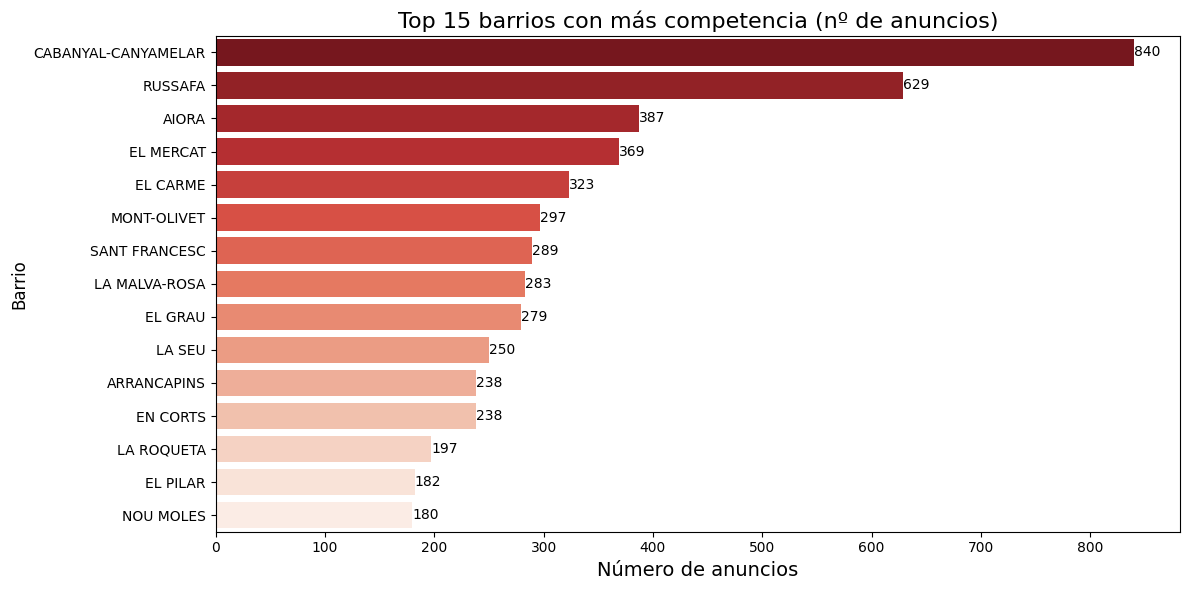

In [ ]:
top_comp = competencia_por_barrio.sort_values(by='n_anuncios', ascending=False).head(15)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_comp,
    y='neighbourhood',
    x='n_anuncios',
    palette='Reds_r'
)
plt.title("Top 15 barrios con más competencia (nº de anuncios)", fontsize=16)
plt.xlabel("Número de anuncios", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()

# Mostrar la etiqueta en cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.show()

In [ ]:
# MÉTODO 2: Solo anuncios activos (por ejemplo, con más de 30 días alquilados al año)

# Filtro para anuncios con cierta actividad
activos = df[df['days_rented'] > 30]

# Competencia real (anuncios activos por barrio)
competencia_activa = activos.groupby('neighbourhood').agg({
    'id': 'count'
}).rename(columns={'id': 'n_anuncios_activos'}).reset_index()

print(competencia_activa.head())

  neighbourhood_cleansed  n_anuncios_activos
0                  AIORA                 348
1                 ALBORS                  97
2            ARRANCAPINS                 204
3              BENICALAP                 109
4              BENIFERRI                  12


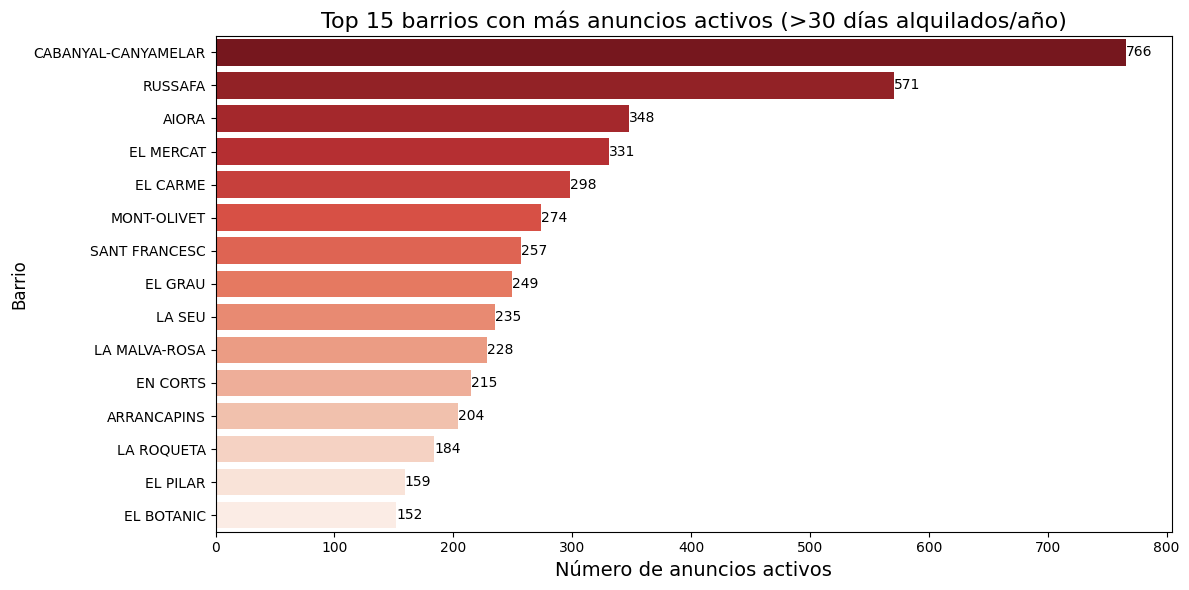

In [ ]:


top_activos = competencia_activa.sort_values(by='n_anuncios_activos', ascending=False).head(15)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_activos,
    y='neighbourhood',
    x='n_anuncios_activos',
    palette='Reds_r'
)
plt.title("Top 15 barrios con más anuncios activos (>30 días alquilados/año)", fontsize=16)
plt.xlabel("Número de anuncios activos", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.show()

In [ ]:
# MÉTODO 3: Competencia por tipo de propiedad
# Competencia por tipo de alojamiento y barrio
competencia_tipo = df.groupby(['neighbourhood', 'room_type']).agg({
    'id': 'count'
}).rename(columns={'id': 'n_anuncios'}).reset_index()

print(competencia_tipo.head())



  neighbourhood_cleansed        room_type  n_anuncios
0                  AIORA  Entire home/apt         308
1                  AIORA     Private room          79
2                 ALBORS  Entire home/apt          75
3                 ALBORS     Private room          36
4            ARRANCAPINS  Entire home/apt         159


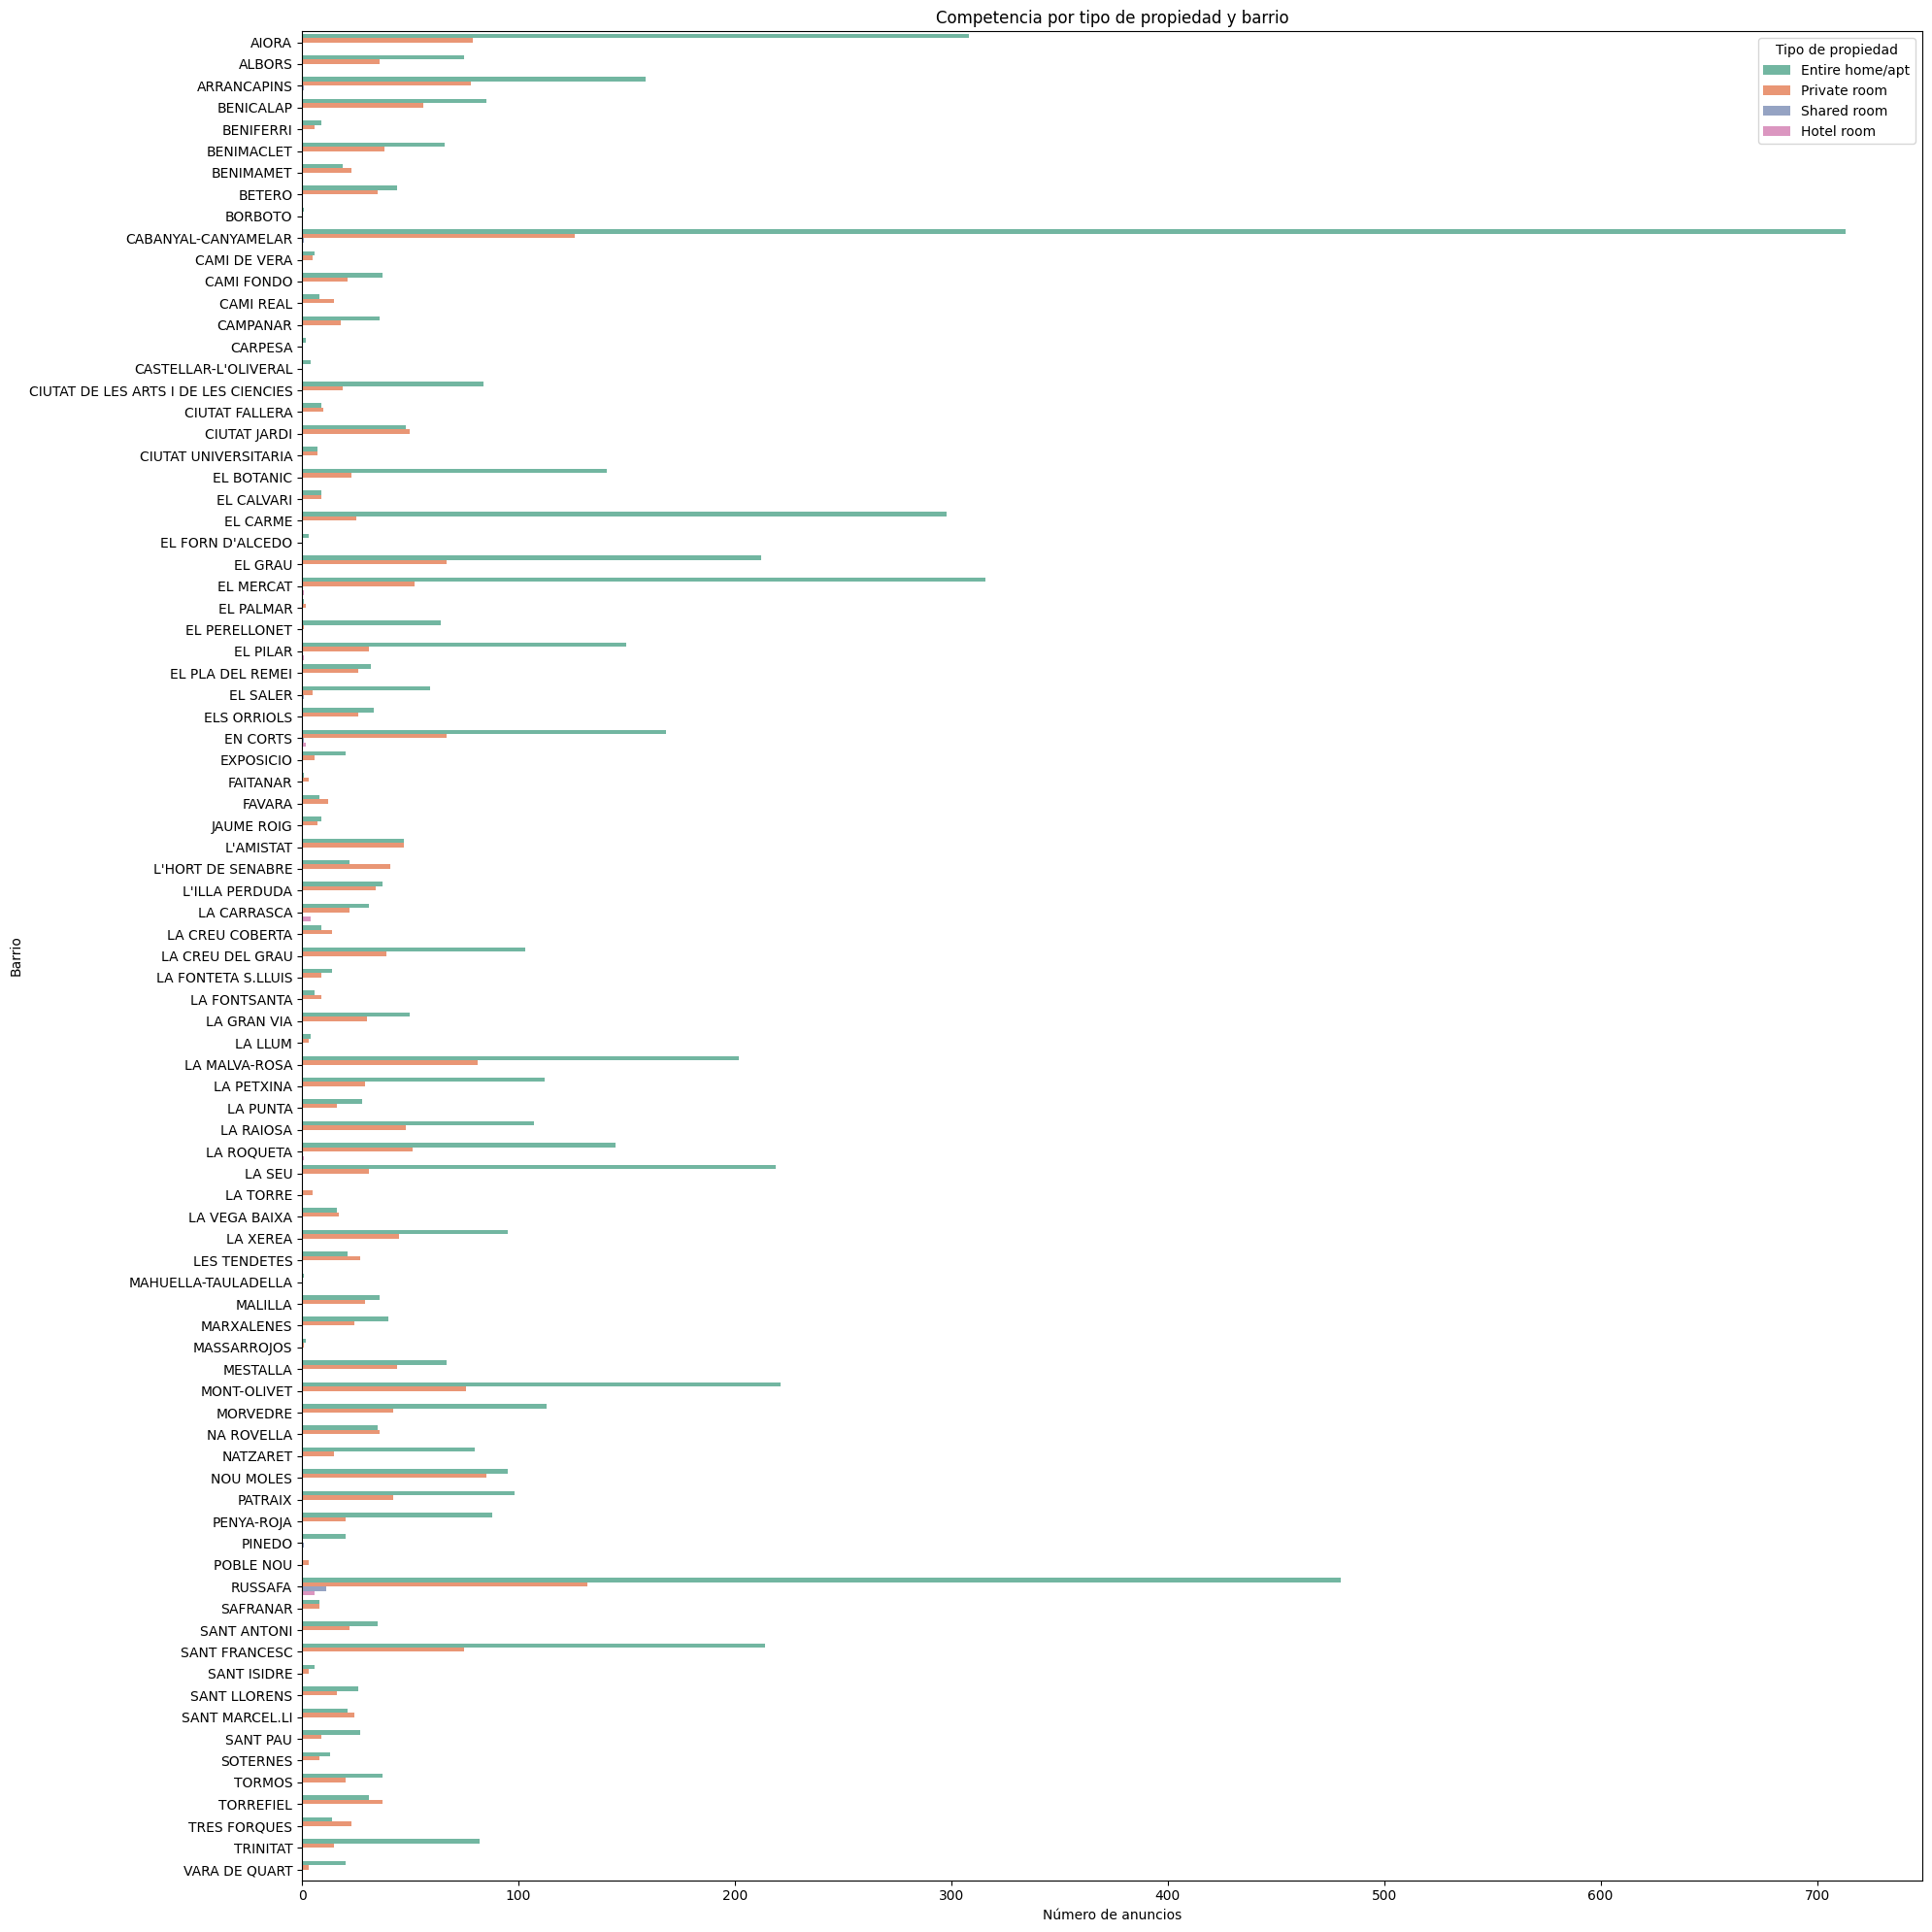

In [ ]:
plt.figure(figsize=(20, 20))
ax = sns.barplot(
    data=competencia_tipo,
    x='n_anuncios',
    y='neighbourhood',
    hue='room_type',
    palette='Set2'
)
plt.title("Competencia por tipo de propiedad y barrio")
plt.xlabel("Número de anuncios")
plt.ylabel("Barrio")
plt.legend(title="Tipo de propiedad")
plt.tight_layout()
plt.show()

In [ ]:
#combinar con otras métricas
# Fusionar con la tabla principal de estadísticas
zona_stats = zona_stats.merge(competencia_por_barrio, on='neighbourhood', how='left')
zona_stats = zona_stats.merge(competencia_activa, on='neighbourhood', how='left')

# Calcular saturación por m² estimado
zona_stats['anuncios_por_m2'] = zona_stats['n_anuncios_activos'] / average_m2


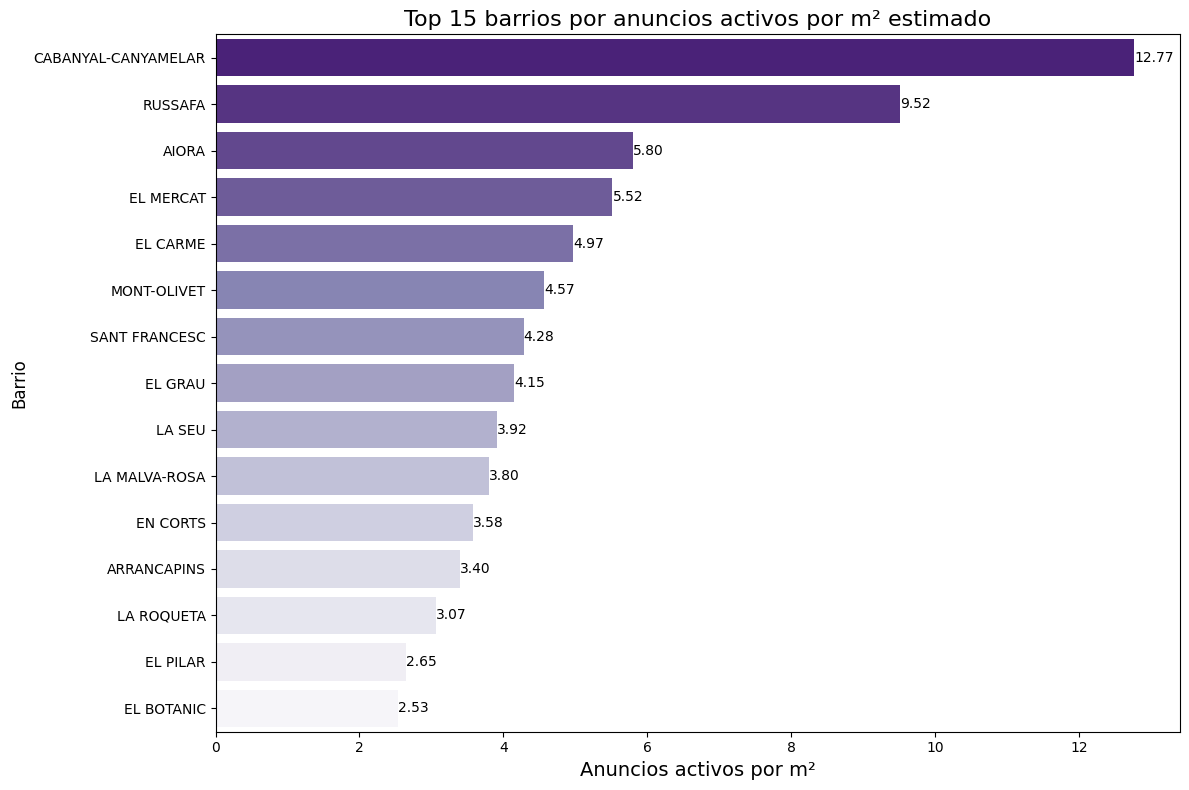

In [ ]:
top_anuncios_m2 = zona_stats.sort_values('anuncios_por_m2', ascending=False).head(15)

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=top_anuncios_m2['neighbourhood'],
    x=top_anuncios_m2['anuncios_por_m2'],
    palette='Purples_r'
)
plt.title("Top 15 barrios por anuncios activos por m² estimado", fontsize=16)
plt.xlabel("Anuncios activos por m²", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

In [28]:
#Competencia ajustada por demanda

#Zonas con muchos anuncios y poca demanda aparecen con un índice alto = 🔴 alta competencia y baja rentabilidad.
zona_stats['indice_saturacion'] = zona_stats['n_anuncios_activos'] / zona_stats['days_rented']


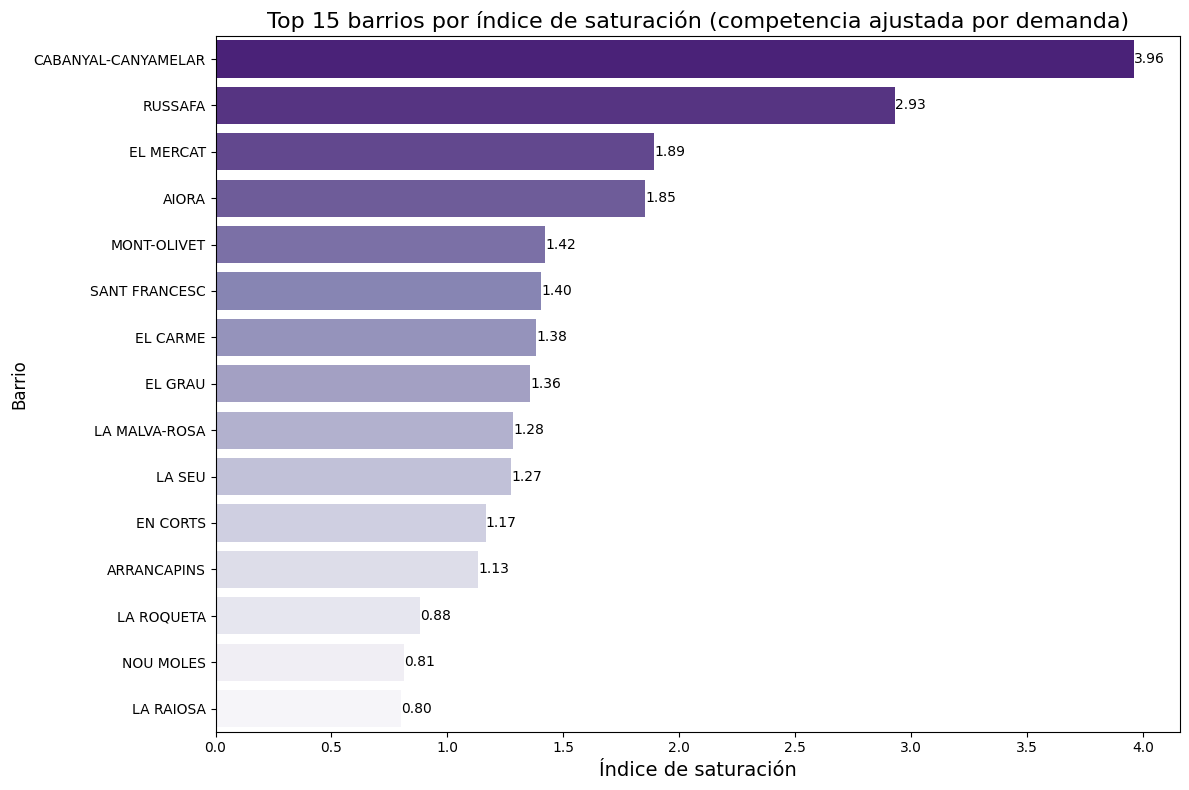

In [ ]:
top_saturacion = zona_stats.sort_values('indice_saturacion', ascending=False).head(15)

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=top_saturacion['neighbourhood'],
    x=top_saturacion['indice_saturacion'],
    palette='Purples_r'
)
plt.title("Top 15 barrios por índice de saturación (competencia ajustada por demanda)", fontsize=16)
plt.xlabel("Índice de saturación", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

In [ ]:
# RENTABILIDAD VS OPERACION

# Limpiar precio de alquiler (ya está en float en df['price'])
average_m2 = 60

# Agrupar datos de alquiler por barrio
zona_rent = df.groupby('neighbourhood').agg({
    'price': 'mean',
    'days_rented': 'mean'
}).reset_index()

# Calcular ingreso anual estimado
zona_rent['ingreso_anual'] = zona_rent['price'] * zona_rent['days_rented']

# Agregar precios de compra por m² desde df_inmobiliario
zona_rent = zona_rent.merge(
    df_inmobiliario[['neighbourhood', 'Precio Valencia']],
    on='neighbourhood',
    how='left'
)
zona_rent = zona_rent.rename(columns={'Precio Valencia': 'precio_compra_m2'})

# Calcular precio de compra total
zona_rent['precio_compra_total'] = zona_rent['precio_compra_m2'] * average_m2

# Calcular rentabilidad bruta (%)
zona_rent['rentabilidad_bruta_%'] = (zona_rent['ingreso_anual'] / zona_rent['precio_compra_total']) * 100

# Ordenar y mostrar
zona_rent = zona_rent.sort_values(by='rentabilidad_bruta_%', ascending=False)
print(zona_rent[['neighbourhood', 'ingreso_anual', 'precio_compra_total', 'rentabilidad_bruta_%']])


   neighbourhood_cleansed  ingreso_anual  precio_compra_total  \
69                 PINEDO  207730.557864             120000.0   
30               EL SALER   96982.372129             150000.0   
14                CARPESA   73790.500000             120000.0   
11             CAMI FONDO   66170.453331             120000.0   
80                 TORMOS   66105.652197             120000.0   
..                    ...            ...                  ...   
34               FAITANAR    4925.250000             120000.0   
53               LA TORRE    3398.720000             120840.0   
23       EL FORN D'ALCEDO    1839.444444             120000.0   
70              POBLE NOU    1185.555556             132000.0   
39         L'ILLA PERDUDA   18152.093062                  NaN   

    rentabilidad_bruta_%  
69            173.108798  
30             64.654915  
14             61.492083  
11             55.142044  
80             55.088043  
..                   ...  
34              4.104375  
53 

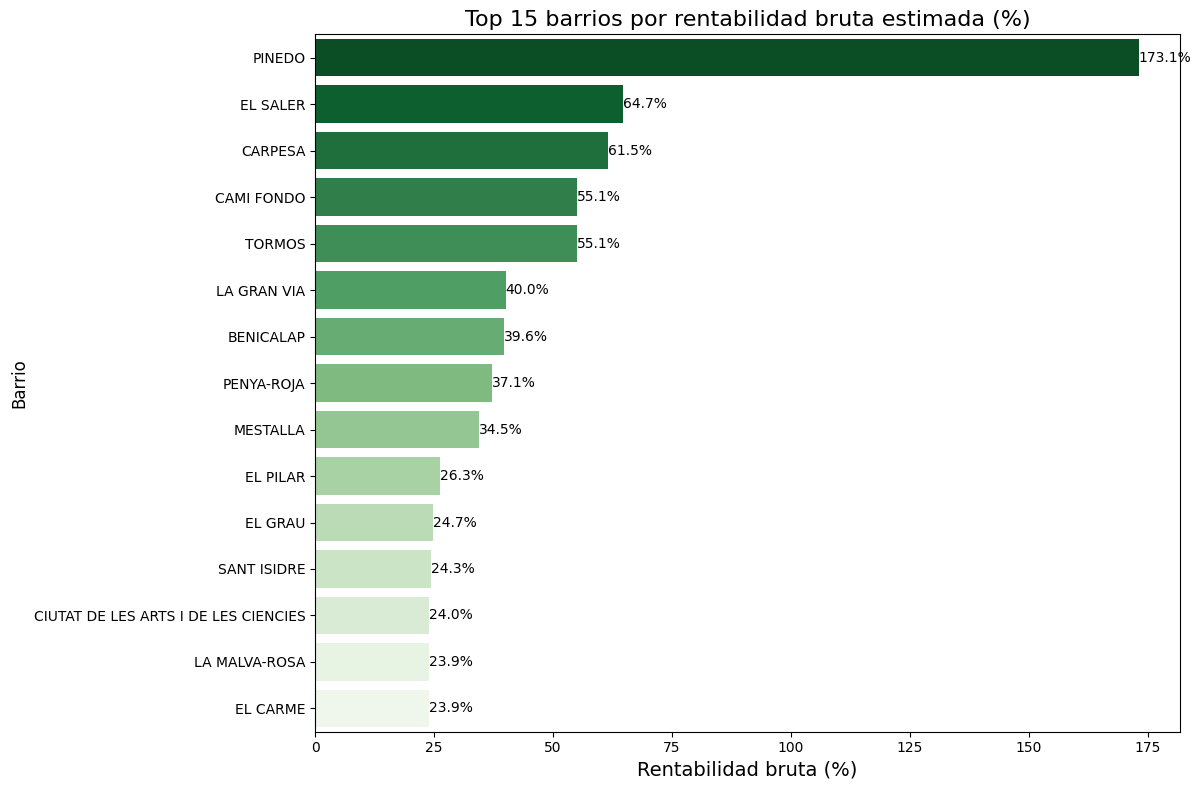

In [ ]:
# === 9. Visualizar top 15 barrios con mejor rentabilidad ===
top_rent = zona_rent.head(15).copy()
top_rent['neighbourhood'] = top_rent['neighbourhood'].str.strip().str.replace('\n', '', regex=True)

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=top_rent['neighbourhood'],
    x=top_rent['rentabilidad_bruta_%'],
    palette='Greens_r'
)
plt.title("Top 15 barrios por rentabilidad bruta estimada (%)", fontsize=16)
plt.xlabel("Rentabilidad bruta (%)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.show()

                  neighbourhood_cleansed  precio_compra_optimo  \
69                                PINEDO          3.462176e+06   
30                              EL SALER          1.616373e+06   
14                               CARPESA          1.229842e+06   
11                            CAMI FONDO          1.102841e+06   
80                                TORMOS          1.101761e+06   
3                              BENICALAP          9.720921e+05   
22                              EL CARME          8.826847e+05   
61                              MESTALLA          8.624732e+05   
45                           LA GRAN VIA          8.409217e+05   
68                            PENYA-ROJA          8.170139e+05   
16  CIUTAT DE LES ARTS I DE LES CIENCIES          7.196726e+05   
20                            EL BOTANIC          6.823831e+05   
33                             EXPOSICIO          6.173014e+05   
25                             EL MERCAT          5.867144e+05   
74        

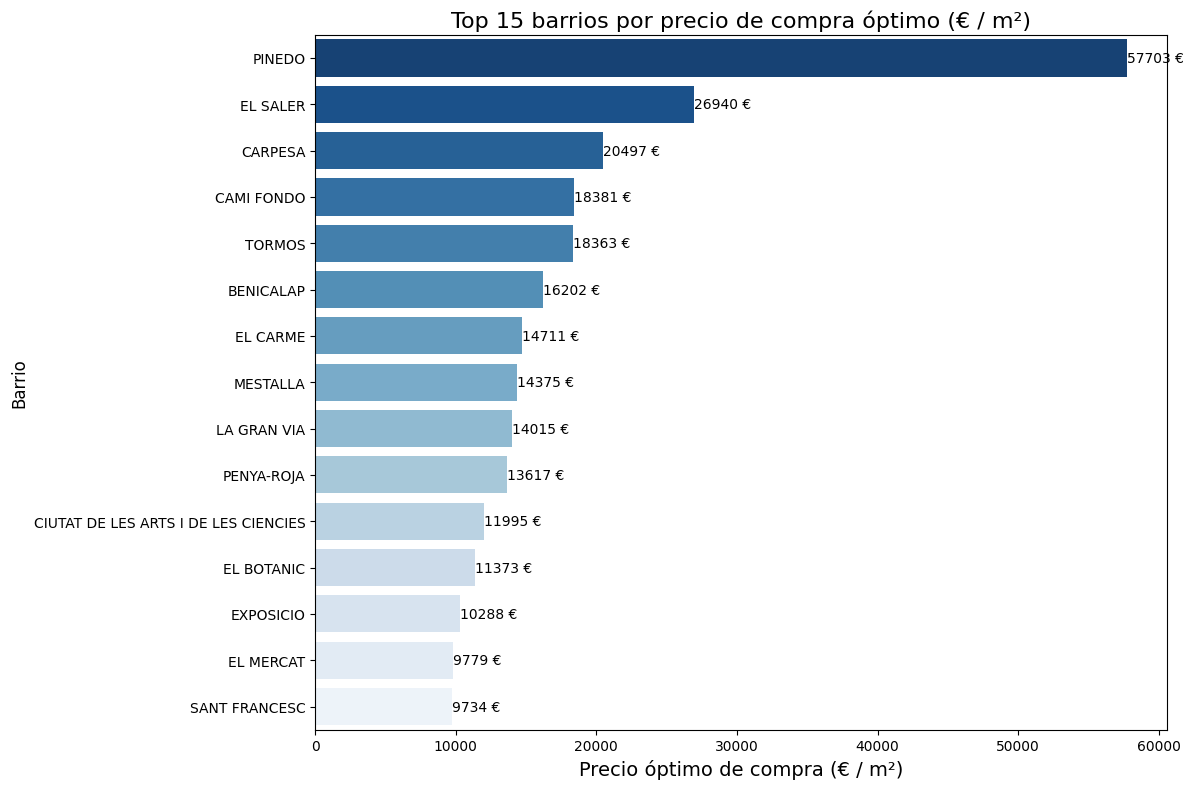

In [ ]:
# Calcular los pisos con mayor roi neto con un precio de compra óptimo
zona_rent['precio_compra_optimo'] = zona_rent['ingreso_anual'] / 0.06  # Rentabilidad bruta del 6%
zona_rent['precio_compra_optimo_m2'] = zona_rent['precio_compra_optimo'] / average_m2
# Ordenar por precio de compra óptimo por m²
zona_rent = zona_rent.sort_values(by='precio_compra_optimo_m2', ascending=False)
print(zona_rent[['neighbourhood', 'precio_compra_optimo', 'precio_compra_optimo_m2']].head(15))
# Visualizar los top 15 barrios por precio de compra óptimo (€ / m²)
top_optimo = zona_rent.head(15)
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=top_optimo['neighbourhood'],
    x=top_optimo['precio_compra_optimo_m2'],
    palette='Blues_r'
)  
plt.title("Top 15 barrios por precio de compra óptimo (€ / m²)", fontsize=16)
plt.xlabel("Precio óptimo de compra (€ / m²)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f €')
plt.show()

                                                   name  \
6968                        SOROLLA 2 BEDROOMS 5 PEOPLE   
8796                          Global Isea Calpe 02 7135   
8342           Cozy fishermen’s house 5’ from the beach   
5290  1 Bedroom Apartment. 3 PAX. Catedral. Valencia...   
6582                          Coqueto Apartamento playa   
37                            Precioso Loft en Valencia   
3149                       Apartamento playa malvarrosa   
325                      APARTAMENTOS WALLACE 3 ADULTOS   
3356  Apartamento 2 dormitorios 75m2 - VALENCIAFLATS...   
38    Apartamento Maravilloso. Centro de Valencia (W...   
3354  Apartamento 1 dormitorio - VALENCIAFLATS CIUDA...   
326                      APARTAMENTOS WALLACE 2 ADULTOS   
8157                   Valencia Apartamento Picasso - 1   
8525                 The Malvarrosa Beach II Apartament   
94                  Appartamento TOP in zona lussuosa !   

                    neighbourhood_cleansed   price  day

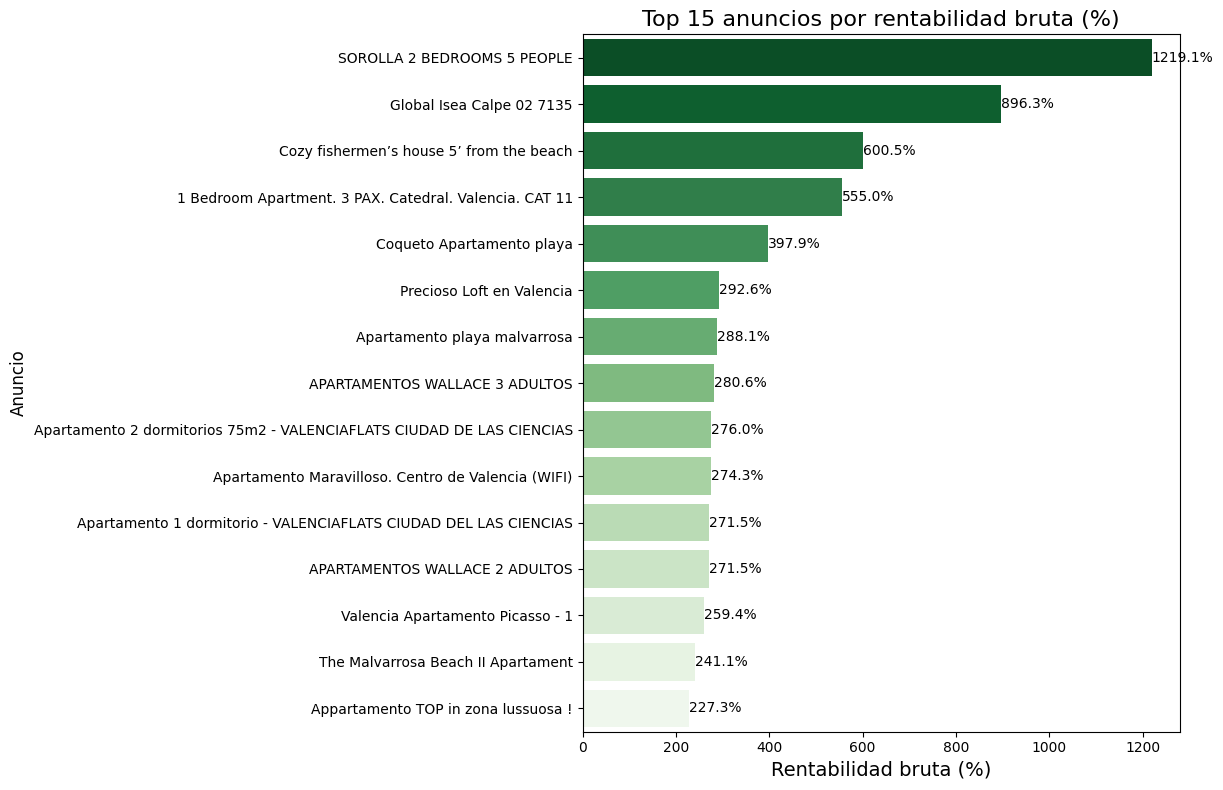

In [ ]:
#calcular los anuncios con mayor rentabilidad bruta
df['rentabilidad_bruta_%'] = (df['annual_income'] / df['estimated_property_value']) * 100
# Filtrar los anuncios con rentabilidad bruta mayor al 6%
anuncios_rentables = df[df['rentabilidad_bruta_%'] > 6].copy()
# Ordenar por rentabilidad bruta
anuncios_rentables = anuncios_rentables.sort_values(by='rentabilidad_bruta_%', ascending=False)
print(anuncios_rentables[['name', 'neighbourhood', 'price', 'days_rented', 'annual_income', 'estimated_property_value', 'rentabilidad_bruta_%']].head(15))
# Visualizar los anuncios con mayor rentabilidad bruta
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=anuncios_rentables['name'].head(15),
    x=anuncios_rentables['rentabilidad_bruta_%'].head(15),
    palette='Greens_r'
)
plt.title("Top 15 anuncios por rentabilidad bruta (%)", fontsize=16)
plt.xlabel("Rentabilidad bruta (%)", fontsize=14)
plt.ylabel("Anuncio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.show()

                  neighbourhood_cleansed  rentabilidad_bruta_%
14                               CARPESA             45.155554
45                           LA GRAN VIA             30.316012
33                             EXPOSICIO             23.905311
25                             EL MERCAT             23.190362
16  CIUTAT DE LES ARTS I DE LES CIENCIES             22.903266
28                              EL PILAR             22.340960
74                         SANT FRANCESC             21.832148
22                              EL CARME             21.098211
29                      EL PLA DEL REMEI             20.861381
51                            LA ROQUETA             20.793643
68                            PENYA-ROJA             19.621018
52                                LA SEU             19.204940
76                          SANT LLORENS             18.568971
71                               RUSSAFA             18.459845
11                            CAMI FONDO             18

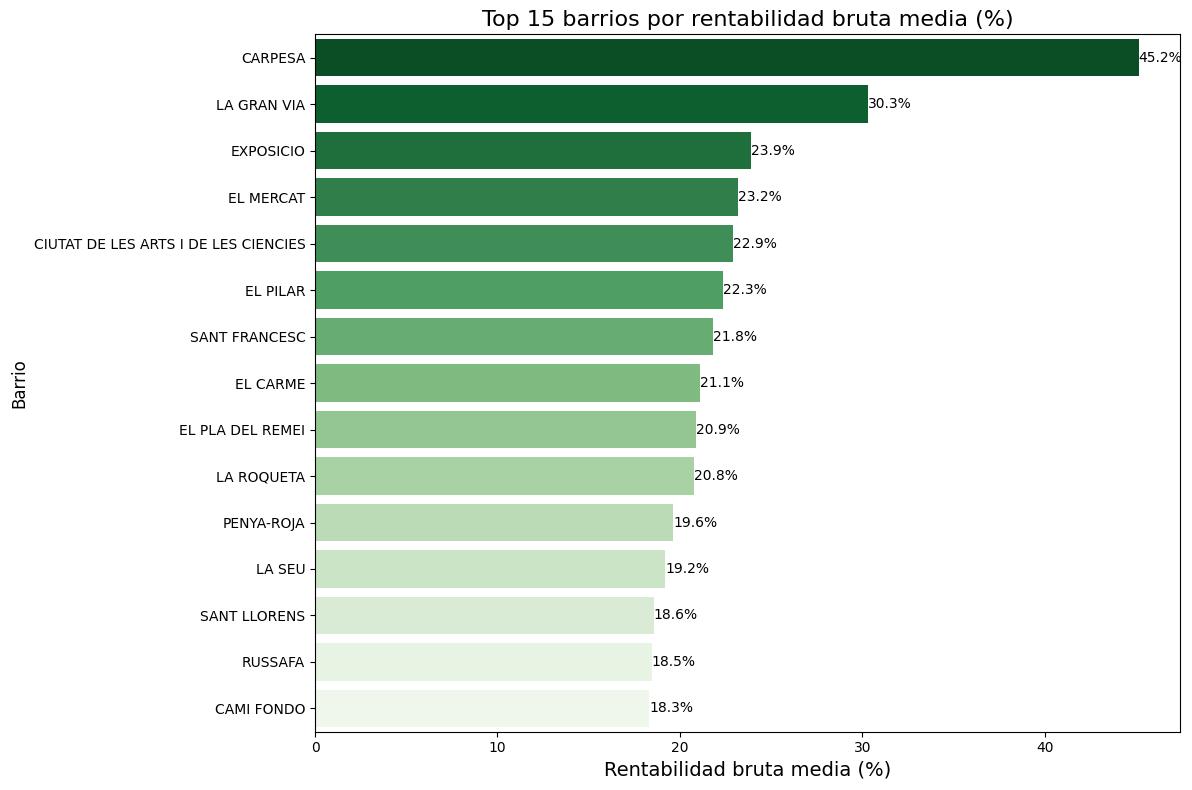

In [ ]:
# barrio con mayor rentabilidad bruta
barrio_rentabilidad = df.groupby('neighbourhood')['rentabilidad_bruta_%'].mean().reset_index()
barrio_rentabilidad = barrio_rentabilidad.sort_values(by='rentabilidad_bruta_%', ascending=False)
print(barrio_rentabilidad.head(15))
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_rentabilidad['neighbourhood'].head(15),
    x=barrio_rentabilidad['rentabilidad_bruta_%'].head(15),
    palette='Greens_r'
)
plt.title("Top 15 barrios por rentabilidad bruta media (%)", fontsize=16)
plt.xlabel("Rentabilidad bruta media (%)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.show()

                  neighbourhood_cleansed  Net ROI (%)
14                               CARPESA    43.319029
45                           LA GRAN VIA    28.479487
33                             EXPOSICIO    22.068786
25                             EL MERCAT    21.353837
16  CIUTAT DE LES ARTS I DE LES CIENCIES    21.066741
28                              EL PILAR    20.504435
74                         SANT FRANCESC    19.995623
22                              EL CARME    19.261687
29                      EL PLA DEL REMEI    19.024856
51                            LA ROQUETA    18.957118
68                            PENYA-ROJA    17.784493
52                                LA SEU    17.368416
76                          SANT LLORENS    16.732446
71                               RUSSAFA    16.623321
11                            CAMI FONDO    16.482684


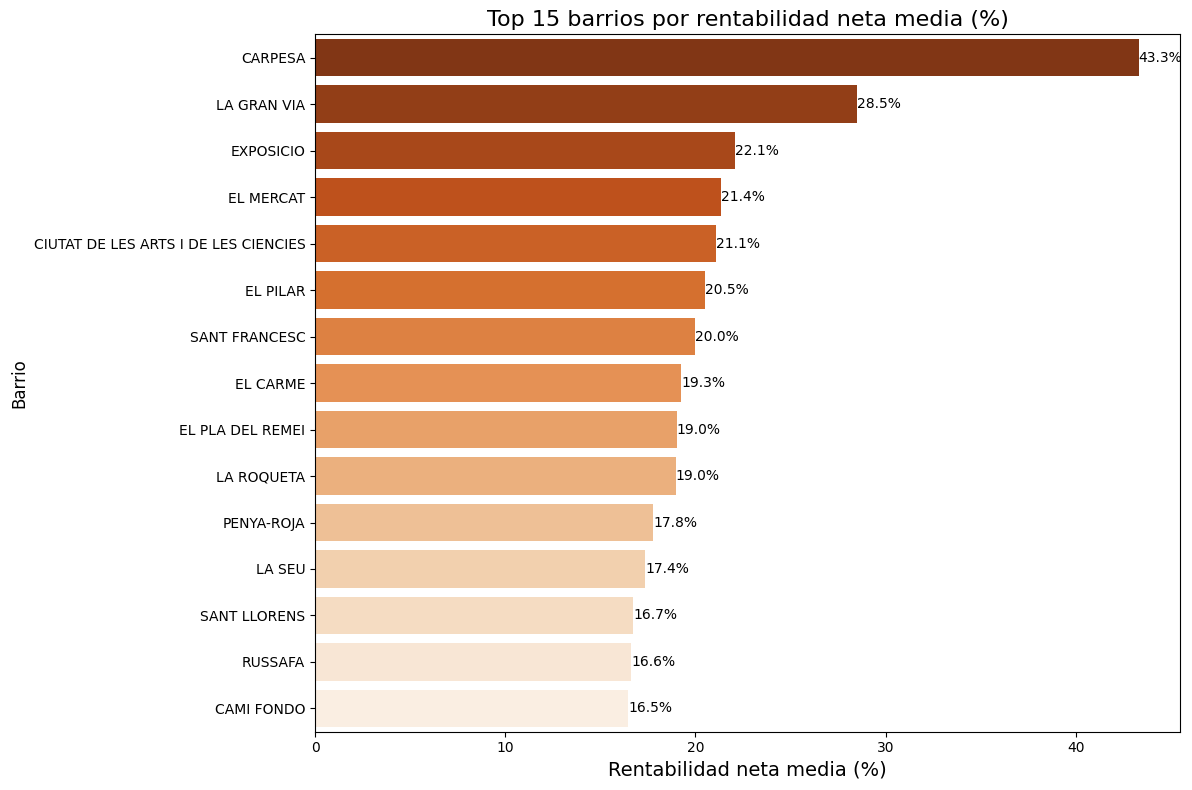

In [ ]:
#barrio con mayor rentabilidad neta
barrio_rentabilidad_neta = df.groupby('neighbourhood')['Net ROI (%)'].mean().reset_index()
barrio_rentabilidad_neta = barrio_rentabilidad_neta.sort_values(by='Net ROI (%)', ascending=False)
print(barrio_rentabilidad_neta.head(15))    
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_rentabilidad_neta['neighbourhood'].head(15),
    x=barrio_rentabilidad_neta['Net ROI (%)'].head(15),
    palette='Oranges_r'
)
plt.title("Top 15 barrios por rentabilidad neta media (%)", fontsize=16)
plt.xlabel("Rentabilidad neta media (%)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.show()

                  neighbourhood_cleansed  Net ROI (%)  n_anuncios
0                                CARPESA    43.319029           2
1                            LA GRAN VIA    28.479487          80
2                              EXPOSICIO    22.068786          26
3                              EL MERCAT    21.353837         369
4   CIUTAT DE LES ARTS I DE LES CIENCIES    21.066741         103
5                               EL PILAR    20.504435         182
6                          SANT FRANCESC    19.995623         289
7                               EL CARME    19.261687         323
8                       EL PLA DEL REMEI    19.024856          58
9                             LA ROQUETA    18.957118         197
10                            PENYA-ROJA    17.784493         108
11                                LA SEU    17.368416         250
12                          SANT LLORENS    16.732446          42
13                               RUSSAFA    16.623321         629
14        

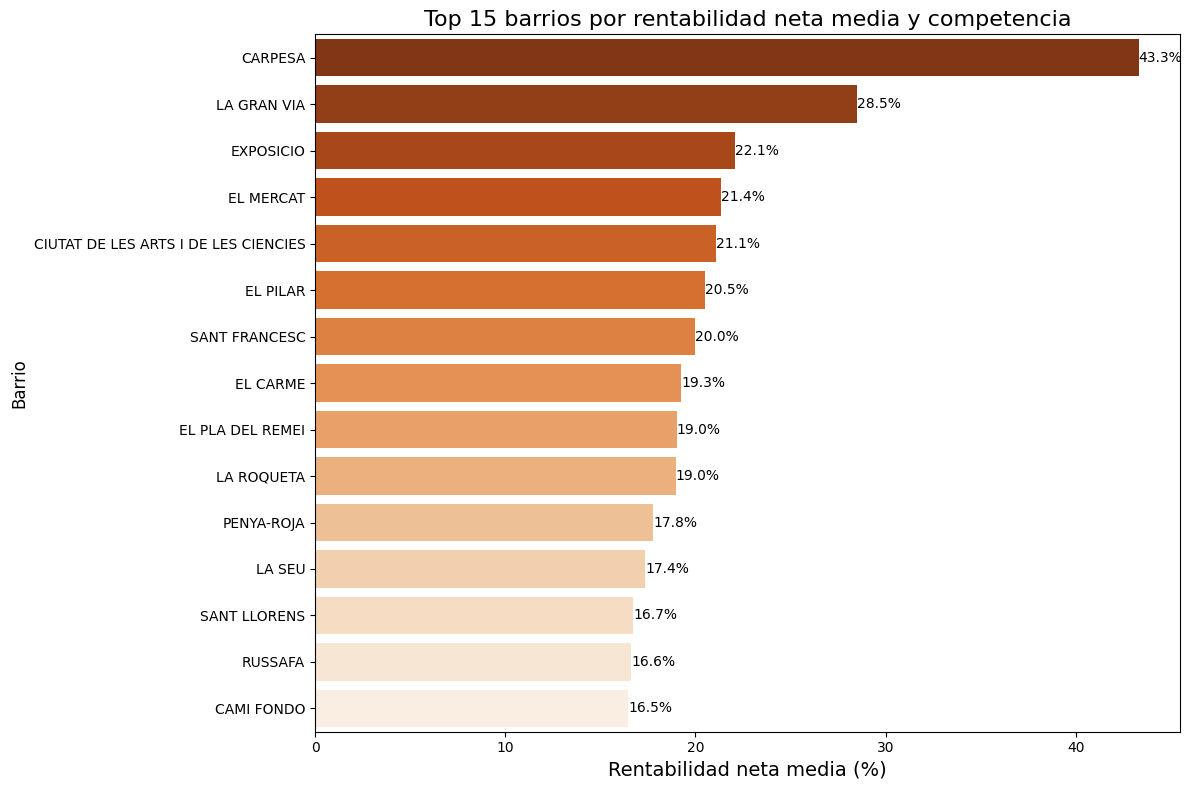

In [ ]:
#barrio mas interesante por rentabilidad neta y competencia
barrio_interesante = barrio_rentabilidad_neta.merge(competencia_por_barrio, on='neighbourhood', how='left')
barrio_interesante = barrio_interesante.sort_values(by='Net ROI (%)', ascending=False)
print(barrio_interesante.head(15))
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_interesante['neighbourhood'].head(15),
    x=barrio_interesante['Net ROI (%)'].head(15),
    palette='Oranges_r'
)
plt.title("Top 15 barrios por rentabilidad neta media y competencia", fontsize=16)
plt.xlabel("Rentabilidad neta media (%)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.show()


                  neighbourhood_cleansed  rentabilidad_bruta_%  n_anuncios
0                                CARPESA             45.155554           2
1                            LA GRAN VIA             30.316012          80
2                              EXPOSICIO             23.905311          26
3                              EL MERCAT             23.190362         369
4   CIUTAT DE LES ARTS I DE LES CIENCIES             22.903266         103
5                               EL PILAR             22.340960         182
6                          SANT FRANCESC             21.832148         289
7                               EL CARME             21.098211         323
8                       EL PLA DEL REMEI             20.861381          58
9                             LA ROQUETA             20.793643         197
10                            PENYA-ROJA             19.621018         108
11                                LA SEU             19.204940         250
12                       

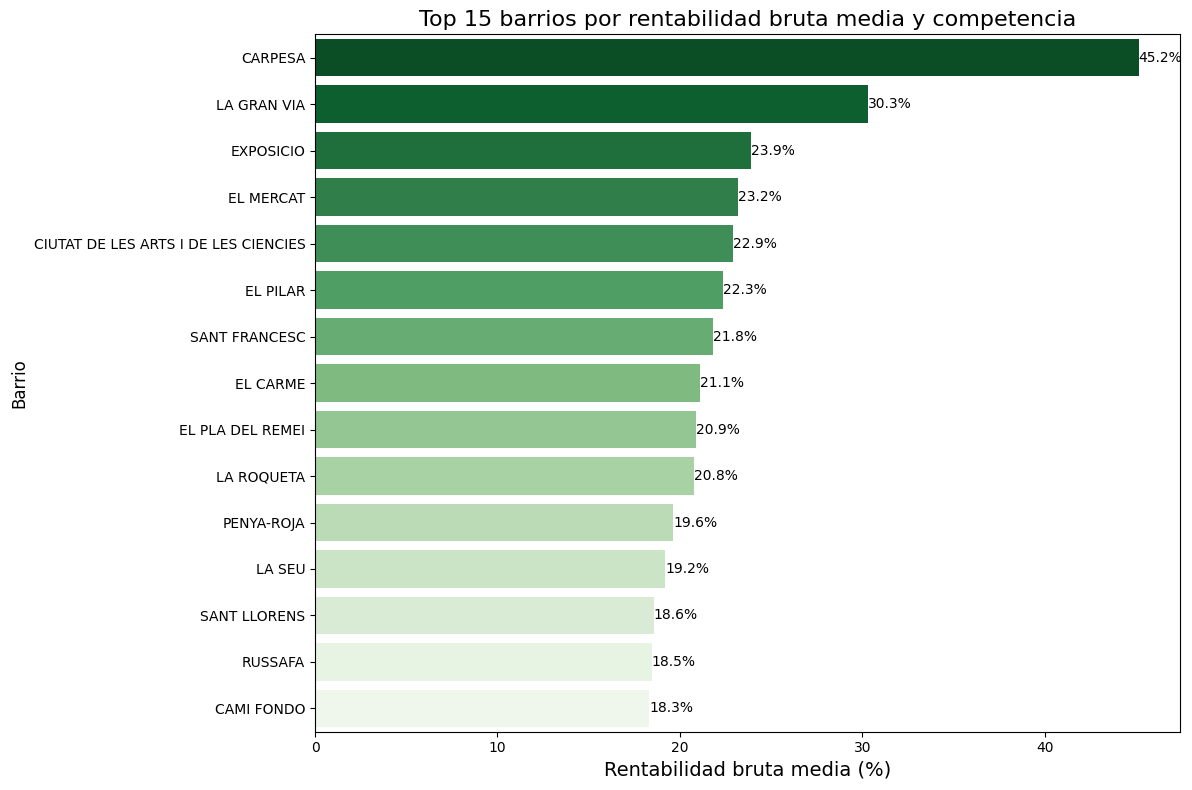

In [ ]:
#barrio mas interesante por rentabilidad bruta y competencia
barrio_interesante_bruta = barrio_rentabilidad.merge(competencia_por_barrio, on='neighbourhood', how='left')
barrio_interesante_bruta = barrio_interesante_bruta.sort_values(by='rentabilidad_bruta_%', ascending=False)
print(barrio_interesante_bruta.head(15))    
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_interesante_bruta['neighbourhood'].head(15),
    x=barrio_interesante_bruta['rentabilidad_bruta_%'].head(15),
    palette='Greens_r'
)
plt.title("Top 15 barrios por rentabilidad bruta media y competencia", fontsize=16)
plt.xlabel("Rentabilidad bruta media (%)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.show()

                  neighbourhood_cleansed  Net ROI (%)  n_anuncios  \
0                                CARPESA    43.319029           2   
1                            LA GRAN VIA    28.479487          80   
2                              EXPOSICIO    22.068786          26   
3                              EL MERCAT    21.353837         369   
4   CIUTAT DE LES ARTS I DE LES CIENCIES    21.066741         103   
5                               EL PILAR    20.504435         182   
6                          SANT FRANCESC    19.995623         289   
7                               EL CARME    19.261687         323   
8                       EL PLA DEL REMEI    19.024856          58   
9                             LA ROQUETA    18.957118         197   
10                            PENYA-ROJA    17.784493         108   
11                                LA SEU    17.368416         250   
12                          SANT LLORENS    16.732446          42   
13                               R

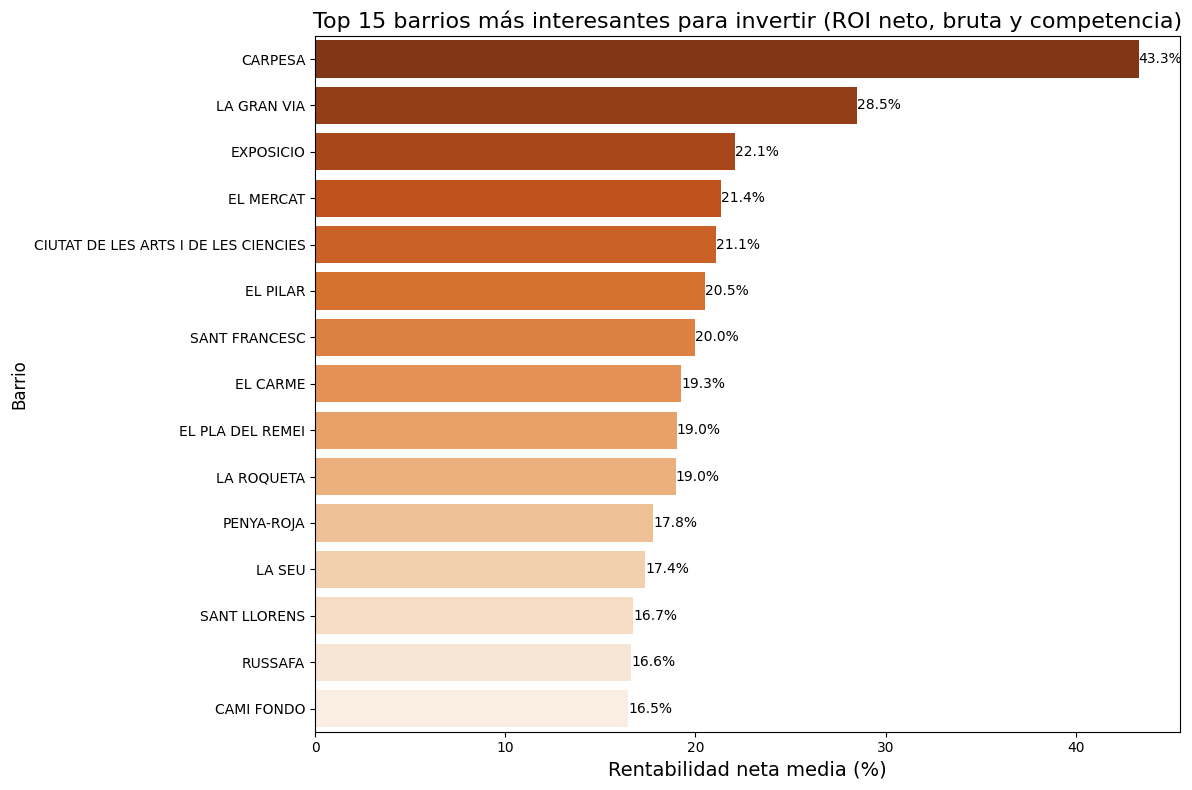

In [ ]:
# Barrio más interesante para invertir: combinar rentabilidad neta y bruta, y competencia
barrio_interesante_final = barrio_interesante.merge(
    barrio_interesante_bruta[['neighbourhood', 'rentabilidad_bruta_%', 'n_anuncios']],
    on='neighbourhood',
    how='left',
    suffixes=('', '_bruta')
)

# Ordenar por mayor rentabilidad neta y menor competencia
barrio_interesante_final = barrio_interesante_final.sort_values(
    by=['Net ROI (%)', 'rentabilidad_bruta_%', 'n_anuncios'],
    ascending=[False, False, True]
)

print(barrio_interesante_final.head(15))

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_interesante_final['neighbourhood'].head(15),
    x=barrio_interesante_final['Net ROI (%)'].head(15),
    palette='Oranges_r'
)
plt.title("Top 15 barrios más interesantes para invertir (ROI neto, bruta y competencia)", fontsize=16)
plt.xlabel("Rentabilidad neta media (%)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.show()

                  neighbourhood_cleansed  Net ROI (%)
14                               CARPESA    43.319029
45                           LA GRAN VIA    28.479487
33                             EXPOSICIO    22.068786
25                             EL MERCAT    21.353837
16  CIUTAT DE LES ARTS I DE LES CIENCIES    21.066741
28                              EL PILAR    20.504435
74                         SANT FRANCESC    19.995623
22                              EL CARME    19.261687
29                      EL PLA DEL REMEI    19.024856
51                            LA ROQUETA    18.957118
68                            PENYA-ROJA    17.784493
52                                LA SEU    17.368416
76                          SANT LLORENS    16.732446
71                               RUSSAFA    16.623321
11                            CAMI FONDO    16.482684


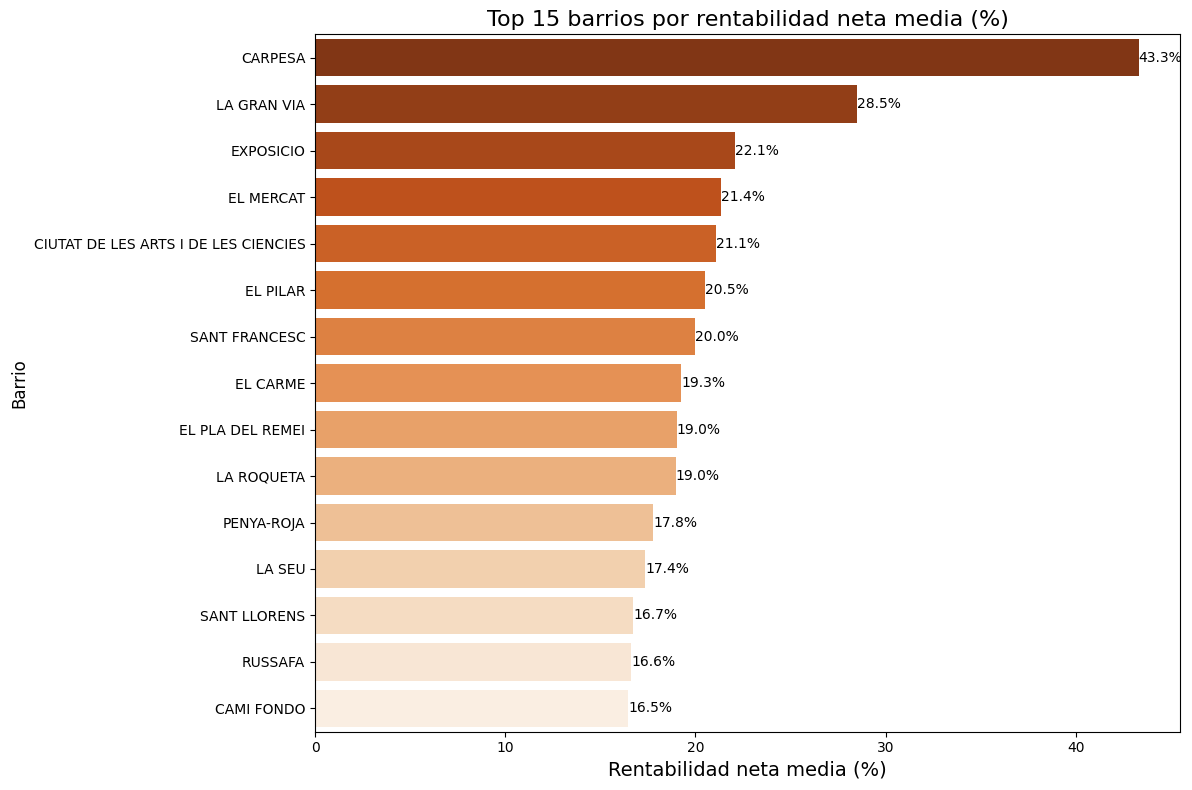

In [ ]:
print(barrio_rentabilidad_neta.head(15))

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_rentabilidad_neta['neighbourhood'].head(15),
    x=barrio_rentabilidad_neta['Net ROI (%)'].head(15),
    palette='Oranges_r'
)
plt.title("Top 15 barrios por rentabilidad neta media (%)", fontsize=16)
plt.xlabel("Rentabilidad neta media (%)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.show()


                  neighbourhood_cleansed  Net ROI (%)  n_anuncios_activos
0                                CARPESA    43.319029                 2.0
1                            LA GRAN VIA    28.479487                72.0
2                              EXPOSICIO    22.068786                26.0
3                              EL MERCAT    21.353837               331.0
4   CIUTAT DE LES ARTS I DE LES CIENCIES    21.066741                90.0
5                               EL PILAR    20.504435               159.0
6                          SANT FRANCESC    19.995623               257.0
7                               EL CARME    19.261687               298.0
8                       EL PLA DEL REMEI    19.024856                48.0
9                             LA ROQUETA    18.957118               184.0
10                            PENYA-ROJA    17.784493                99.0
11                                LA SEU    17.368416               235.0
12                          SANT LLORE

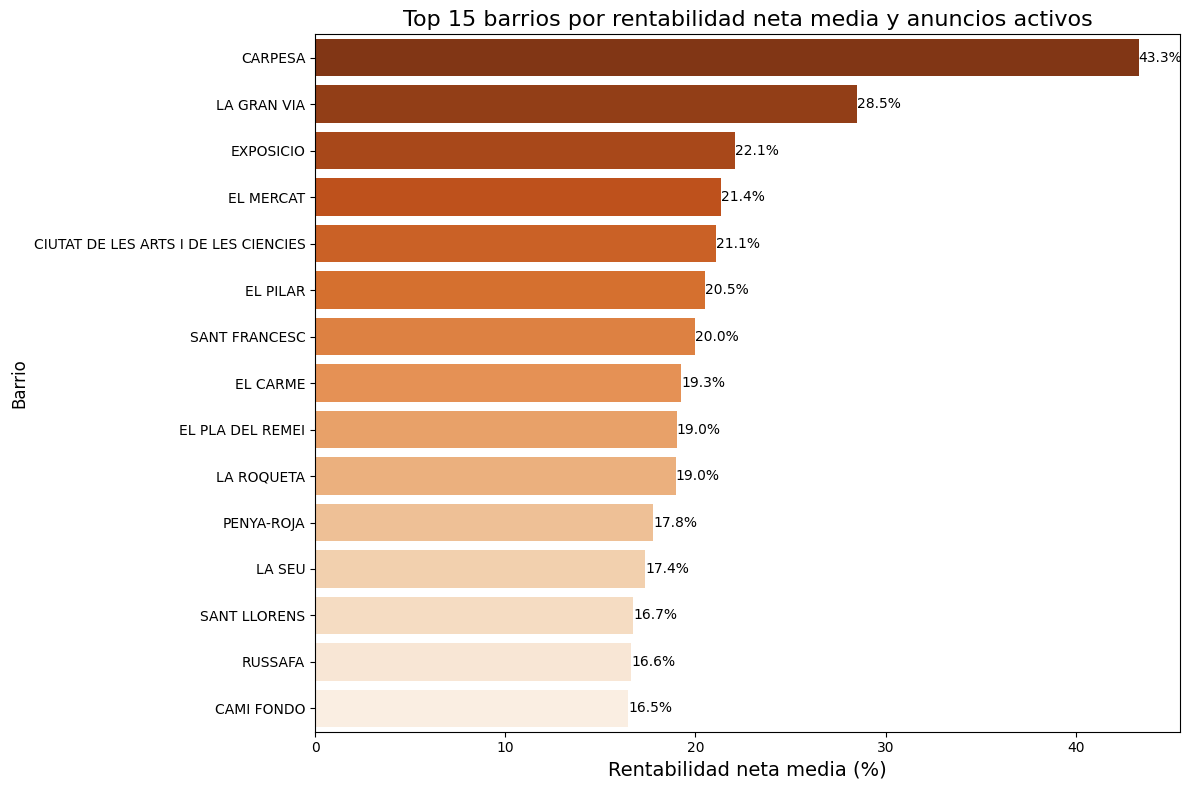

In [ ]:
#barrio con mayor anuncios activos y rentabilidad neta
barrio_anuncios_rentabilidad = barrio_rentabilidad_neta.merge(competencia_activa, on='neighbourhood', how='left')
barrio_anuncios_rentabilidad = barrio_anuncios_rentabilidad.sort_values(by='Net ROI (%)', ascending=False)
print(barrio_anuncios_rentabilidad.head(15))
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_anuncios_rentabilidad['neighbourhood'].head(15),
    x=barrio_anuncios_rentabilidad['Net ROI (%)'].head(15),
    palette='Oranges_r'
)
plt.title("Top 15 barrios por rentabilidad neta media y anuncios activos", fontsize=16)
plt.xlabel("Rentabilidad neta media (%)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.show()

                  neighbourhood_cleansed  Net ROI (%)  precio_compra_optimo_m2
0                                CARPESA    43.319029             33463.234089
14                            CAMI FONDO    16.482684             31336.843373
53                                PINEDO     9.103517             30806.664774
7                               EL CARME    19.261687             30378.386108
2                              EXPOSICIO    22.068786             28972.448922
22                              MESTALLA    13.952551             28854.169192
15                           SANT ISIDRE    15.742386             25028.905332
10                            PENYA-ROJA    17.784493             22514.590757
4   CIUTAT DE LES ARTS I DE LES CIENCIES    21.066741             22404.701959
16                            EL BOTANIC    15.423235             20756.400241
9                             LA ROQUETA    18.957118             18601.757934
1                            LA GRAN VIA    28.47948

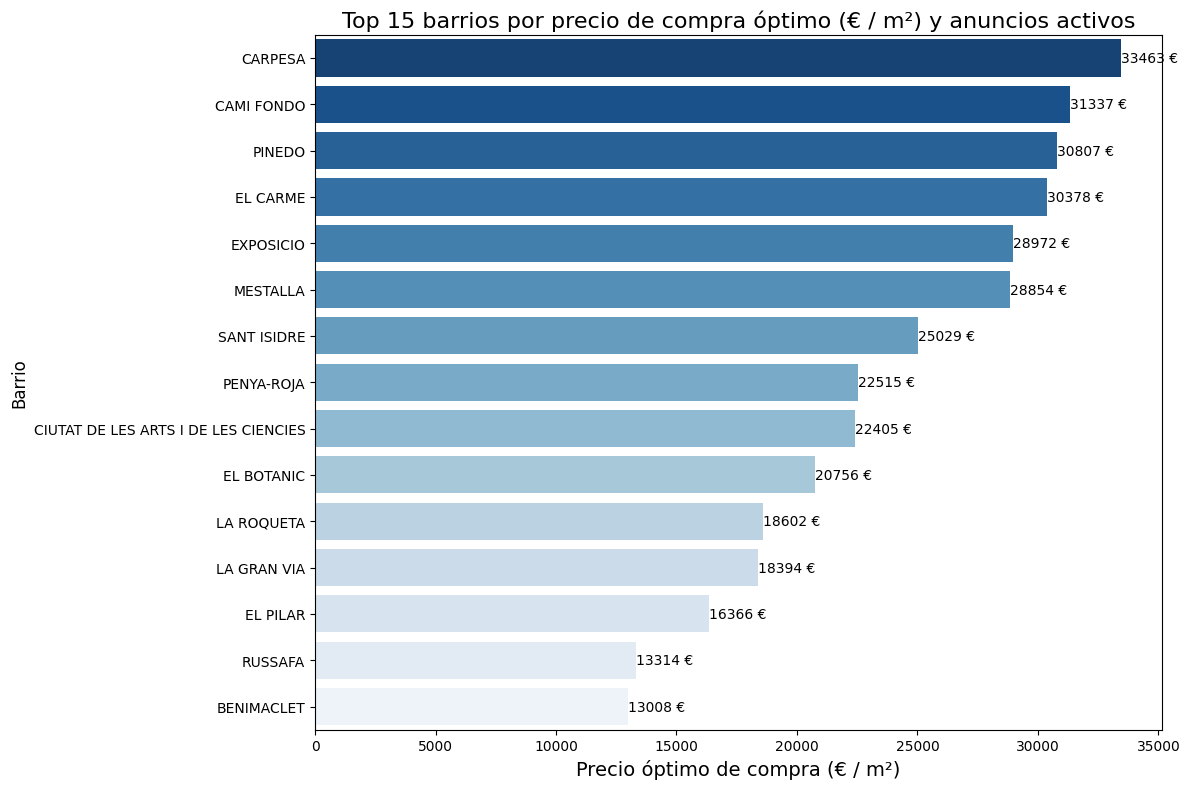

In [ ]:
#barrio con mayor anuncios activos y mayor precio de compra óptimo
barrio_anuncios_precio_optimo = barrio_rentabilidad_neta.merge(
    zona_stats[['neighbourhood', 'precio_compra_optimo_m2']],
    on='neighbourhood',
    how='left'
)
barrio_anuncios_precio_optimo = barrio_anuncios_precio_optimo.sort_values(by='precio_compra_optimo_m2', ascending=False)
print(barrio_anuncios_precio_optimo.head(15))
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_anuncios_precio_optimo['neighbourhood'].head(15),
    x=barrio_anuncios_precio_optimo['precio_compra_optimo_m2'].head(15),
    palette='Blues_r'
)
plt.title("Top 15 barrios por precio de compra óptimo (€ / m²) y anuncios activos", fontsize=16)
plt.xlabel("Precio óptimo de compra (€ / m²)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f €')
plt.show()

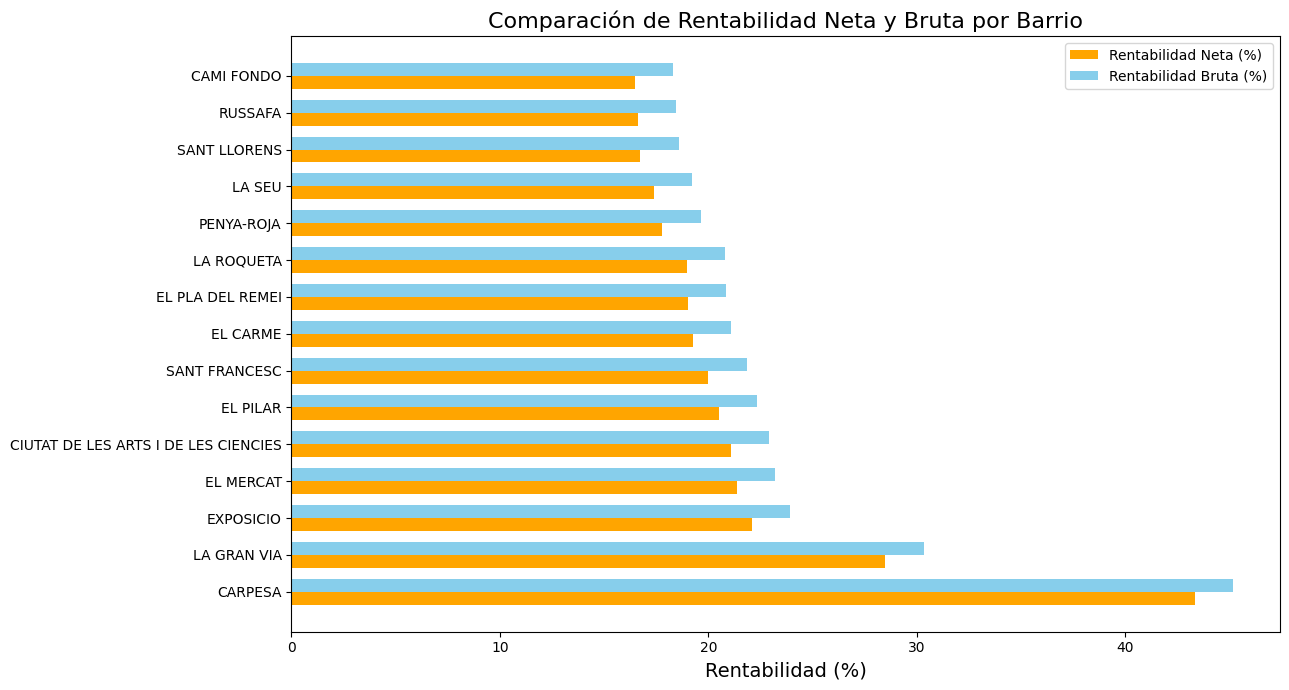

In [ ]:
import numpy as np

# Seleccionar los 15 barrios con mayor rentabilidad neta
top_barrios = comparacion.head(15).copy()

# Crear gráfico de barras agrupadas

barrios = top_barrios['neighbourhood']
neto = top_barrios['Net ROI (%)']
bruto = top_barrios['rentabilidad_bruta_%']

x = np.arange(len(barrios))
width = 0.35

plt.figure(figsize=(13, 7))
plt.barh(x - width/2, neto, height=width, color='orange', label='Rentabilidad Neta (%)')
plt.barh(x + width/2, bruto, height=width, color='skyblue', label='Rentabilidad Bruta (%)')
plt.yticks(x, barrios)
plt.xlabel("Rentabilidad (%)", fontsize=14)
plt.title("Comparación de Rentabilidad Neta y Bruta por Barrio", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()


                  neighbourhood_cleansed  n_amenities
57                   MAHUELLA-TAULADELLA    70.000000
35                                FAVARA    44.650000
23                      EL FORN D'ALCEDO    41.666667
14                               CARPESA    40.500000
33                             EXPOSICIO    36.500000
65                              NATZARET    36.378947
16  CIUTAT DE LES ARTS I DE LES CIENCIES    35.203883
78                              SANT PAU    34.638889
44                          LA FONTSANTA    34.133333
84                         VARA DE QUART    34.086957
9                    CABANYAL-CANYAMELAR    33.198810
27                         EL PERELLONET    32.892308
62                           MONT-OLIVET    32.835017
4                              BENIFERRI    32.666667
79                              SOTERNES    32.333333


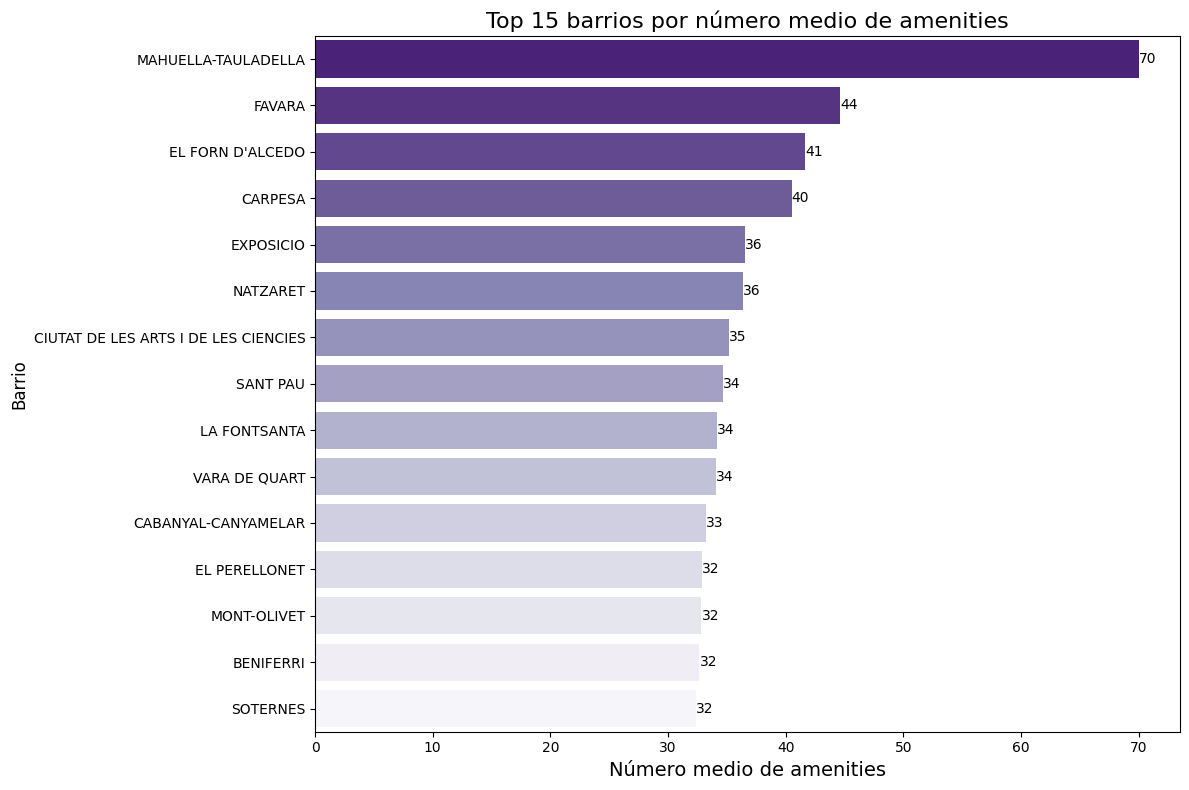

In [ ]:
# barrio con mas amenities
barrio_amenities = df.groupby('neighbourhood')['amenities'].apply(lambda x: x.str.count(',').mean()).reset_index()
barrio_amenities = barrio_amenities.rename(columns={'amenities': 'n_amenities'})
barrio_amenities = barrio_amenities.sort_values(by='n_amenities', ascending=False)
print(barrio_amenities.head(15))
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_amenities['neighbourhood'].head(15),
    x=barrio_amenities['n_amenities'].head(15),
    palette='Purples_r'
)  
plt.title("Top 15 barrios por número medio de amenities", fontsize=16)
plt.xlabel("Número medio de amenities", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.show()

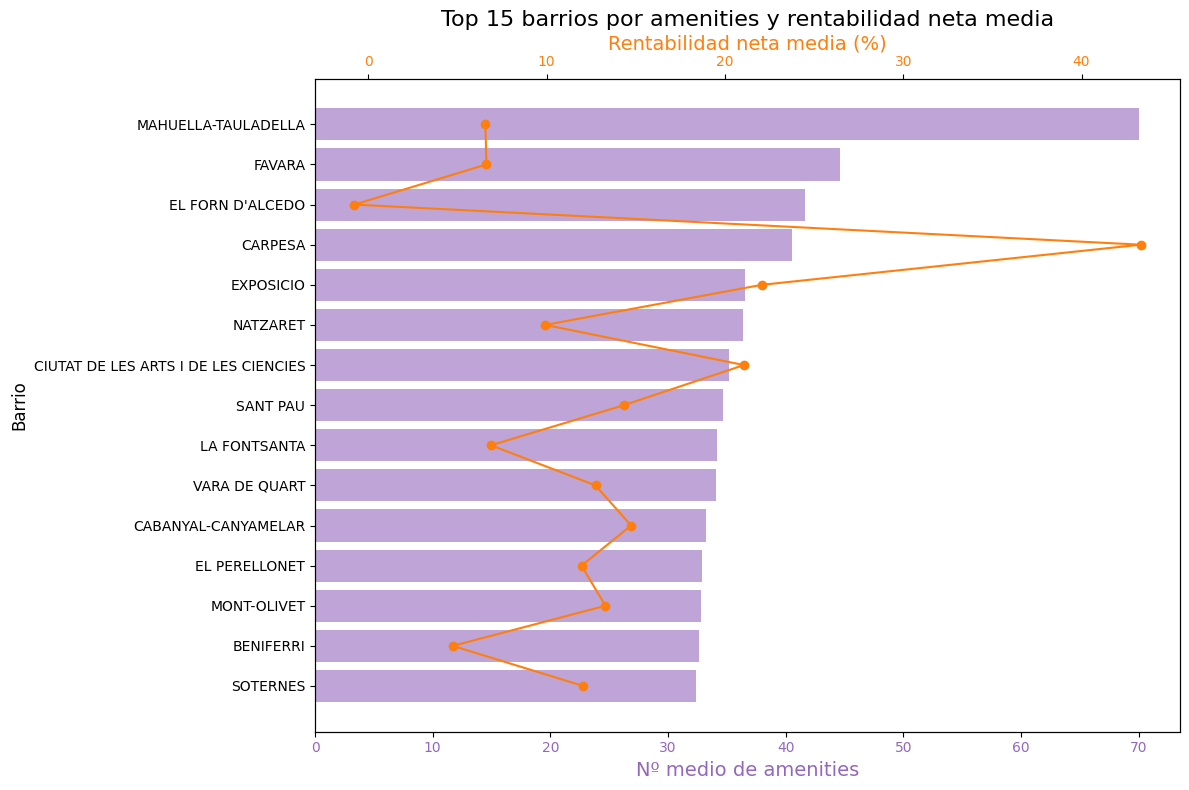

In [ ]:
# Comparar barrios por número medio de amenities y rentabilidad neta media
barrio_amenities_rentabilidad = barrio_amenities.merge(barrio_rentabilidad_neta, on='neighbourhood_', how='left')
barrio_amenities_rentabilidad = barrio_amenities_rentabilidad.sort_values(by='n_amenities', ascending=False).head(15)

fig, ax1 = plt.subplots(figsize=(12, 8))

# Gráfico de barras para amenities
color = 'tab:purple'
ax1.barh(
    barrio_amenities_rentabilidad['neighbourhood'],
    barrio_amenities_rentabilidad['n_amenities'],
    color=color,
    alpha=0.6,
    label='Nº medio de amenities'
)
ax1.set_xlabel('Nº medio de amenities', fontsize=14, color=color)
ax1.set_ylabel('Barrio', fontsize=12)
ax1.tick_params(axis='x', labelcolor=color)
ax1.invert_yaxis()

# Eje secundario para rentabilidad neta
ax2 = ax1.twiny()
color2 = 'tab:orange'
ax2.plot(
    barrio_amenities_rentabilidad['Net ROI (%)'],
    barrio_amenities_rentabilidad['neighbourhood'],
    'o-', color=color2, label='Rentabilidad neta media (%)'
)
ax2.set_xlabel('Rentabilidad neta media (%)', fontsize=14, color=color2)
ax2.tick_params(axis='x', labelcolor=color2)

plt.title("Top 15 barrios por amenities y rentabilidad neta media", fontsize=16)
fig.tight_layout()
plt.show()

                  neighbourhood_cleansed  Net ROI (%)  n_anuncios
0                                CARPESA    43.319029           2
1                            LA GRAN VIA    28.479487          80
2                              EXPOSICIO    22.068786          26
3                              EL MERCAT    21.353837         369
4   CIUTAT DE LES ARTS I DE LES CIENCIES    21.066741         103
5                               EL PILAR    20.504435         182
6                          SANT FRANCESC    19.995623         289
7                               EL CARME    19.261687         323
8                       EL PLA DEL REMEI    19.024856          58
9                             LA ROQUETA    18.957118         197
10                            PENYA-ROJA    17.784493         108
11                                LA SEU    17.368416         250
12                          SANT LLORENS    16.732446          42
13                               RUSSAFA    16.623321         629
14        

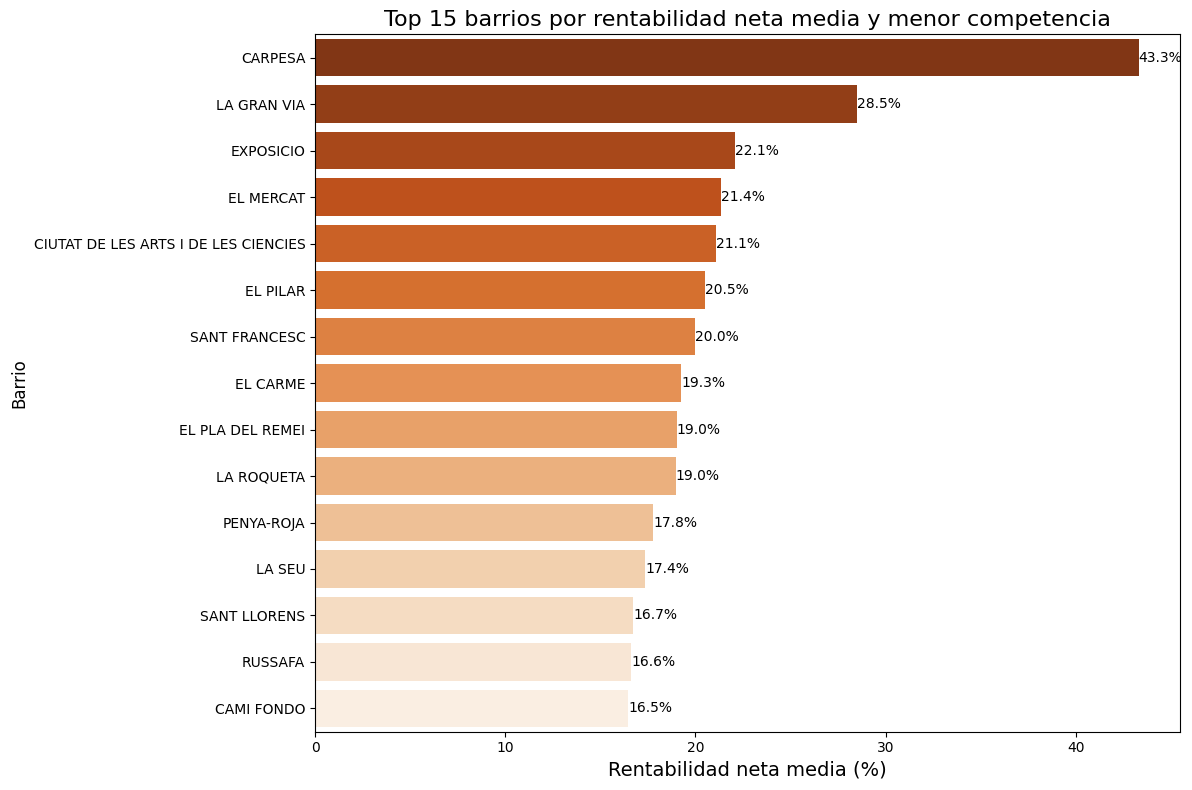

In [ ]:
# barrio con mayor rentabilidad neta y menor competencia
barrio_neto_competencia = barrio_rentabilidad_neta.merge(competencia_por_barrio, on='neighbourhood', how='left')
barrio_neto_competencia = barrio_neto_competencia.sort_values(by='Net ROI (%)', ascending=False)
print(barrio_neto_competencia.head(15))
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_neto_competencia['neighbourhood'].head(15),
    x=barrio_neto_competencia['Net ROI (%)'].head(15),
    palette='Oranges_r'
)   
plt.title("Top 15 barrios por rentabilidad neta media y menor competencia", fontsize=16)
plt.xlabel("Rentabilidad neta media (%)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.show()

   neighbourhood_cleansed  Net ROI (%)  n_anuncios
0                 CARPESA    43.319029           2
15            SANT ISIDRE    15.742386           9
17            MASSARROJOS    14.822184           3
70    MAHUELLA-TAULADELLA     6.562515           1
74   CASTELLAR-L'OLIVERAL     6.136289           4
75                BORBOTO     5.782604           1
76                LA LLUM     5.153638           7
78              EL PALMAR     4.313385           3
80               FAITANAR     3.359157           4
82               LA TORRE    -0.028405           5
83       EL FORN D'ALCEDO    -0.786645           3
84              POBLE NOU    -1.046819           3


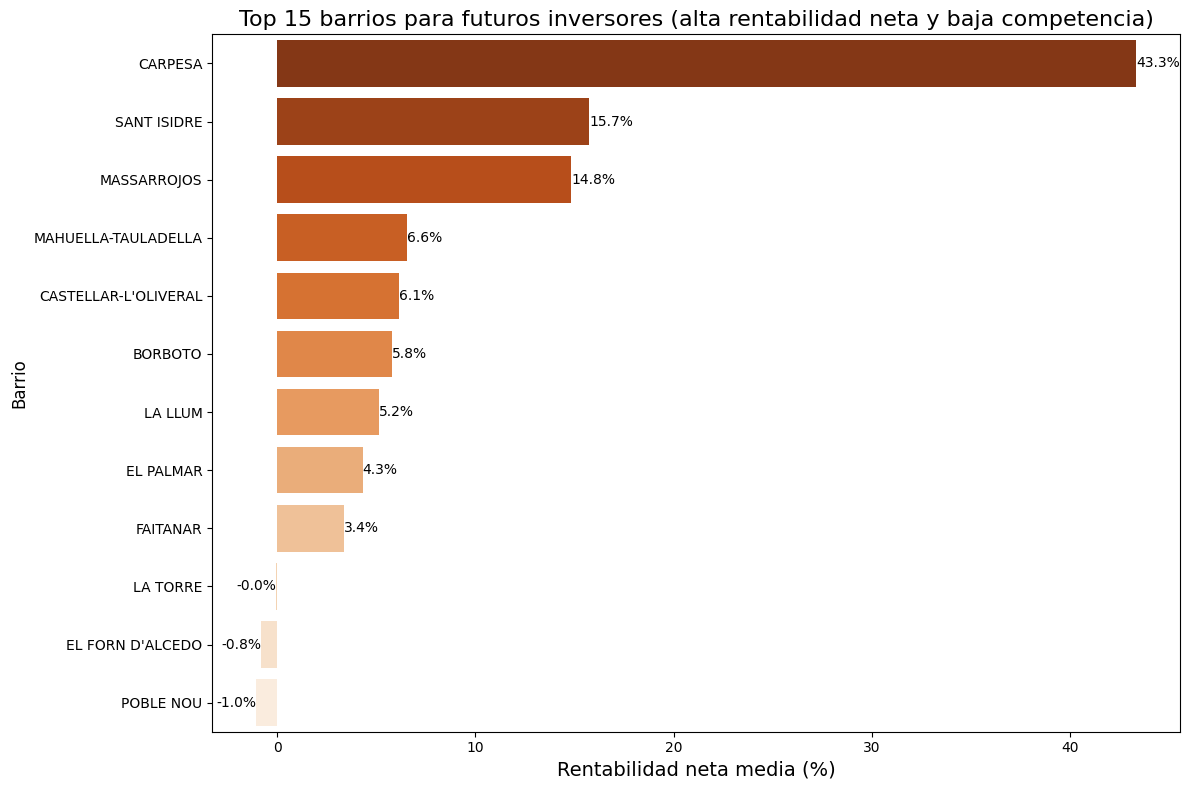

In [ ]:
# para futuros inversores, barrios con alta rentabilidad neta y baja competencia
barrio_futuro_inversion = barrio_neto_competencia[barrio_neto_competencia['n_anuncios'] < 10].sort_values(by='Net ROI (%)', ascending=False)
print(barrio_futuro_inversion.head(15))
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_futuro_inversion['neighbourhood'].head(15),
    x=barrio_futuro_inversion['Net ROI (%)'].head(15),
    palette='Oranges_r'
)
plt.title("Top 15 barrios para futuros inversores (alta rentabilidad neta y baja competencia)", fontsize=16)
plt.xlabel("Rentabilidad neta media (%)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.show()

                  neighbourhood_cleansed  Precio Valencia
25                             EL MERCAT           3933.0
74                         SANT FRANCESC           3900.0
71                               RUSSAFA           3900.0
54                              LA XEREA           3821.0
51                                LA SEU           3800.0
29                      EL PLA DEL REMEI           3777.0
22                              EL CARME           3700.0
20                            EL BOTANIC           3400.0
33                             EXPOSICIO           3200.0
76                          SANT LLORENS           3200.0
13                              CAMPANAR           3134.0
2                            ARRANCAPINS           3100.0
16  CIUTAT DE LES ARTS I DE LES CIENCIES           3000.0
5                             BENIMACLET           2860.0
50                            LA ROQUETA           2800.0


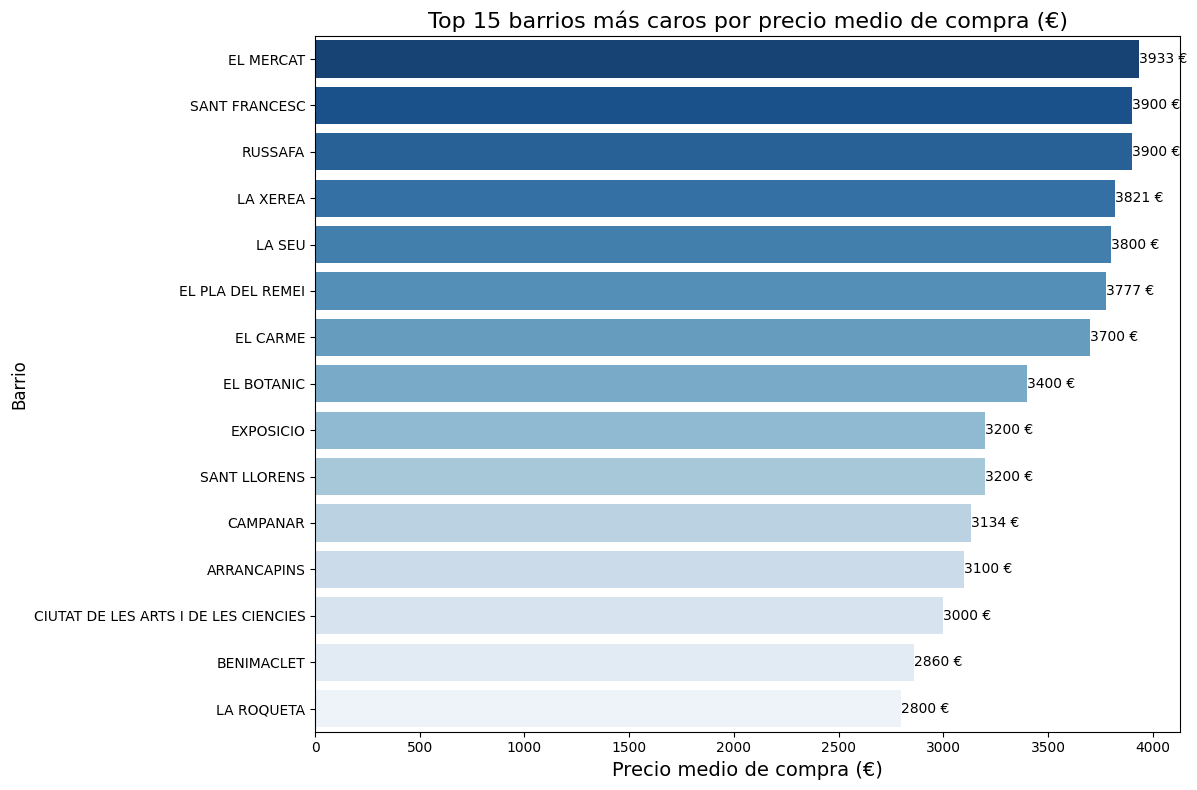

In [ ]:
#barrio mas caros
barrio_caros = df_inmobiliario.groupby('neighbourhood')['Precio Valencia'].mean().reset_index()
barrio_caros = barrio_caros.sort_values(by='Precio Valencia', ascending=False)
print(barrio_caros.head(15))
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_caros['neighbourhood'].head(15),
    x=barrio_caros['Precio Valencia'].head(15),
    palette='Blues_r'
)
plt.title("Top 15 barrios más caros por precio medio m2 de compra (€)", fontsize=16)
plt.xlabel("Precio medio m2 de compra (€)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f €')
plt.show()

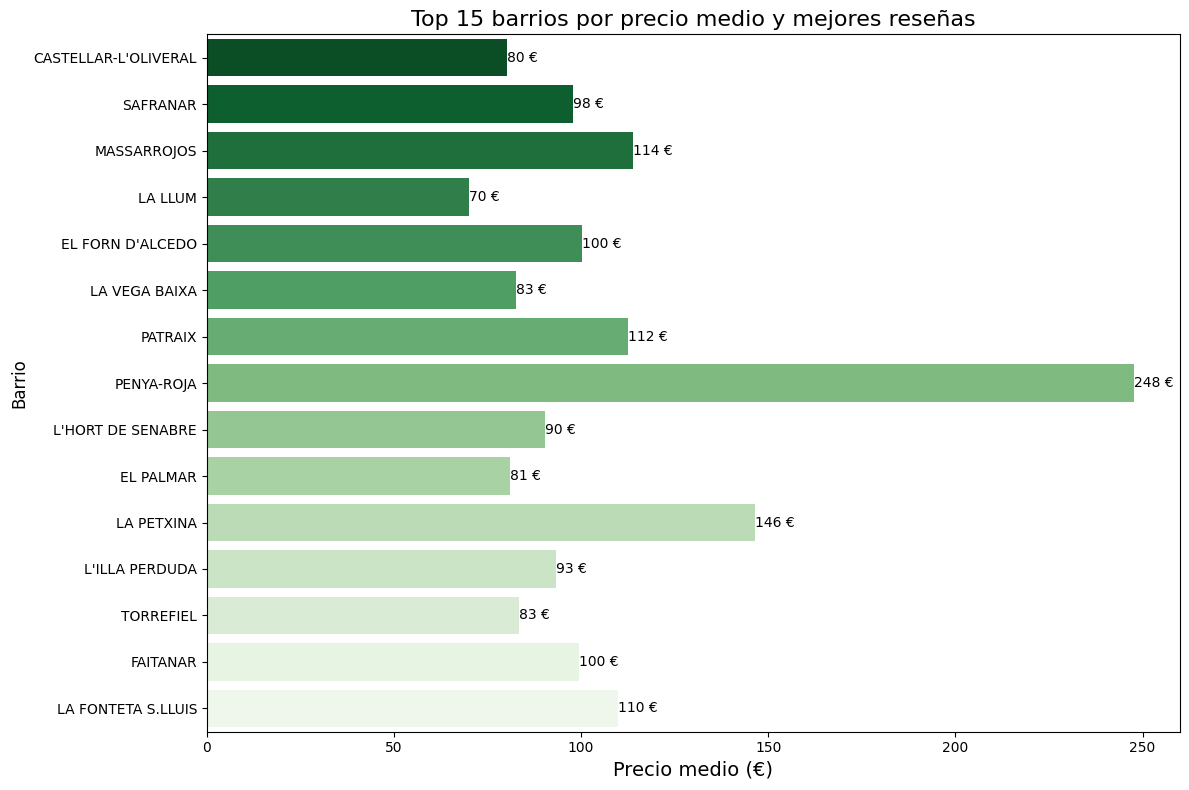

In [ ]:
# precio con mejores reseñas
barrio_precios_resenas = df.groupby('neighbourhood').agg({
    'price': 'mean',
    'review_scores_value': 'mean'
}).reset_index()
barrio_precios_resenas = barrio_precios_resenas.sort_values(by='review_scores_value', ascending=False).head(15)
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_precios_resenas['neighbourhood'],
    x=barrio_precios_resenas['price'],
    palette='Greens_r'
)
plt.title("Top 15 barrios por precio medio y mejores reseñas", fontsize=16)
plt.xlabel("Precio medio (€)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f €')
plt.show()

   neighbourhood_cleansed  number_of_reviews
9     CABANYAL-CANYAMELAR              44591
71                RUSSAFA              35174
25              EL MERCAT              26523
22               EL CARME              24654
74          SANT FRANCESC              21819
52                 LA SEU              20063
0                   AIORA              16223
2             ARRANCAPINS              13808
51             LA ROQUETA              13615
62            MONT-OLIVET              13363
28               EL PILAR              12847
55               LA XEREA              12304
47          LA MALVA-ROSA              11276
20             EL BOTANIC              10992
32               EN CORTS              10450


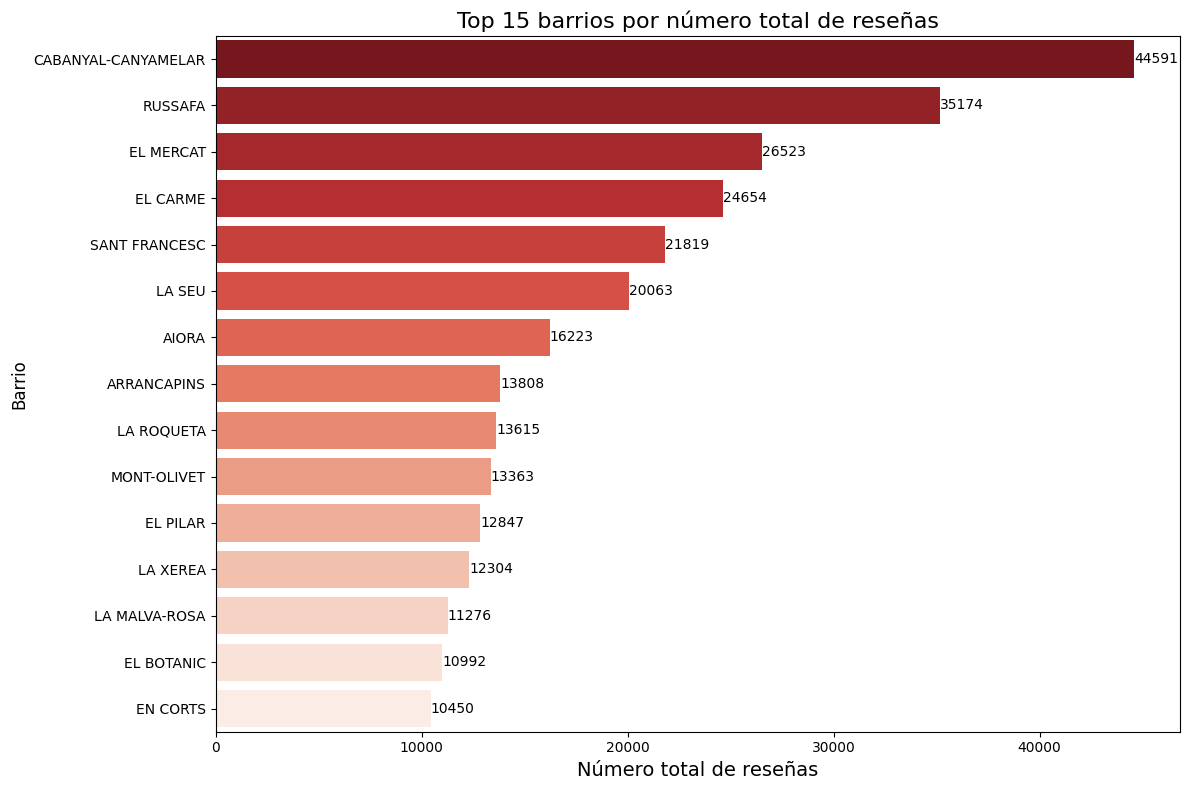

In [ ]:
#barrio con mas reseñas
barrio_mas_resenas = df.groupby('neighbourhood')['number_of_reviews'].sum().reset_index()
barrio_mas_resenas = barrio_mas_resenas.sort_values(by='number_of_reviews', ascending=False)
print(barrio_mas_resenas.head(15))
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_mas_resenas['neighbourhood'].head(15),
    x=barrio_mas_resenas['number_of_reviews'].head(15),
    palette='Reds_r'
)
plt.title("Top 15 barrios por número total de reseñas", fontsize=16)
plt.xlabel("Número total de reseñas", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.show()

   neighbourhood_cleansed  reviews_per_month
23       EL FORN D'ALCEDO           2.776667
76           SANT LLORENS           2.414048
44           LA FONTSANTA           2.362000
77         SANT MARCEL.LI           2.090889
65               NATZARET           2.029474
51             LA ROQUETA           2.029340
20             EL BOTANIC           1.918232
32               EN CORTS           1.910168
0                   AIORA           1.882506
52                 LA SEU           1.837920
55               LA XEREA           1.834714
35                 FAVARA           1.751000
33              EXPOSICIO           1.742308
22               EL CARME           1.725851
28               EL PILAR           1.721648


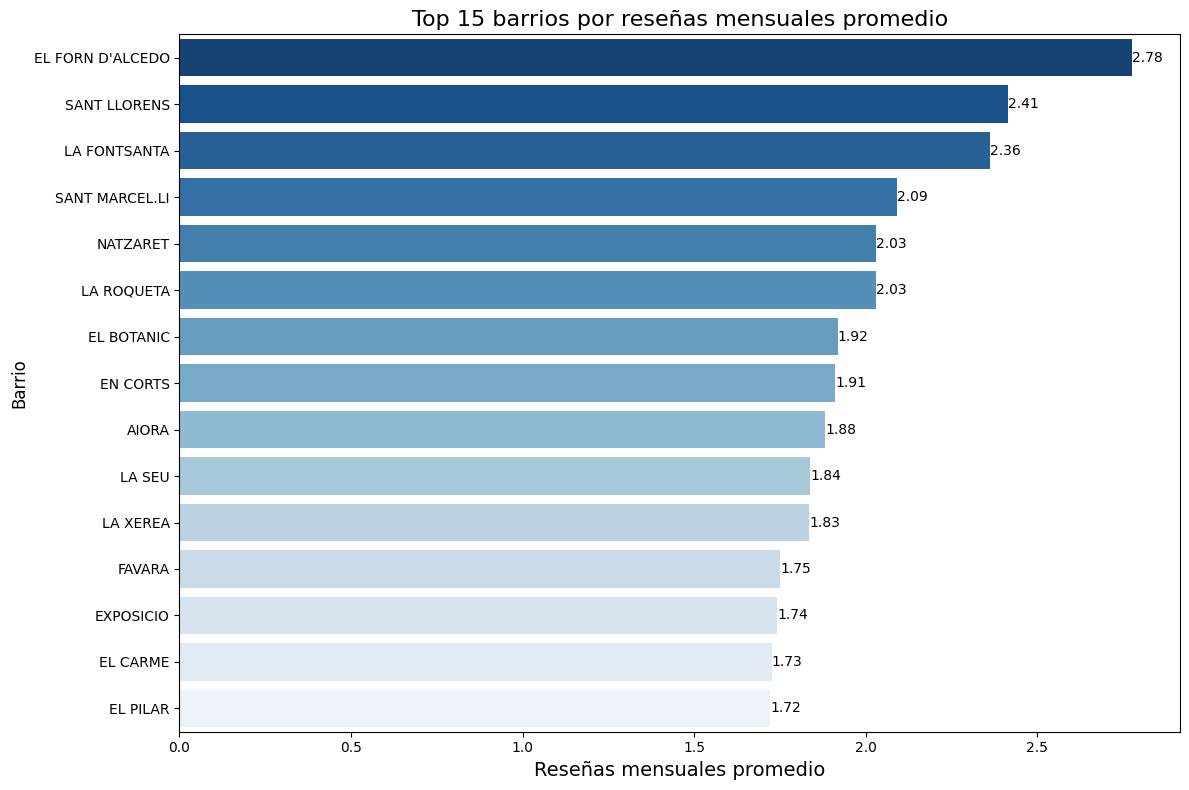

In [ ]:
# mayor reviwes_per_month
barrio_reviews_per_month = df.groupby('neighbourhood')['reviews_per_month'].mean().reset_index()
barrio_reviews_per_month = barrio_reviews_per_month.sort_values(by='reviews_per_month', ascending=False)
print(barrio_reviews_per_month.head(15))
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_reviews_per_month['neighbourhood'].head(15),
    x=barrio_reviews_per_month['reviews_per_month'].head(15),
    palette='Blues_r'
)
plt.title("Top 15 barrios por reseñas mensuales promedio", fontsize=16)
plt.xlabel("Reseñas mensuales promedio", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.show()

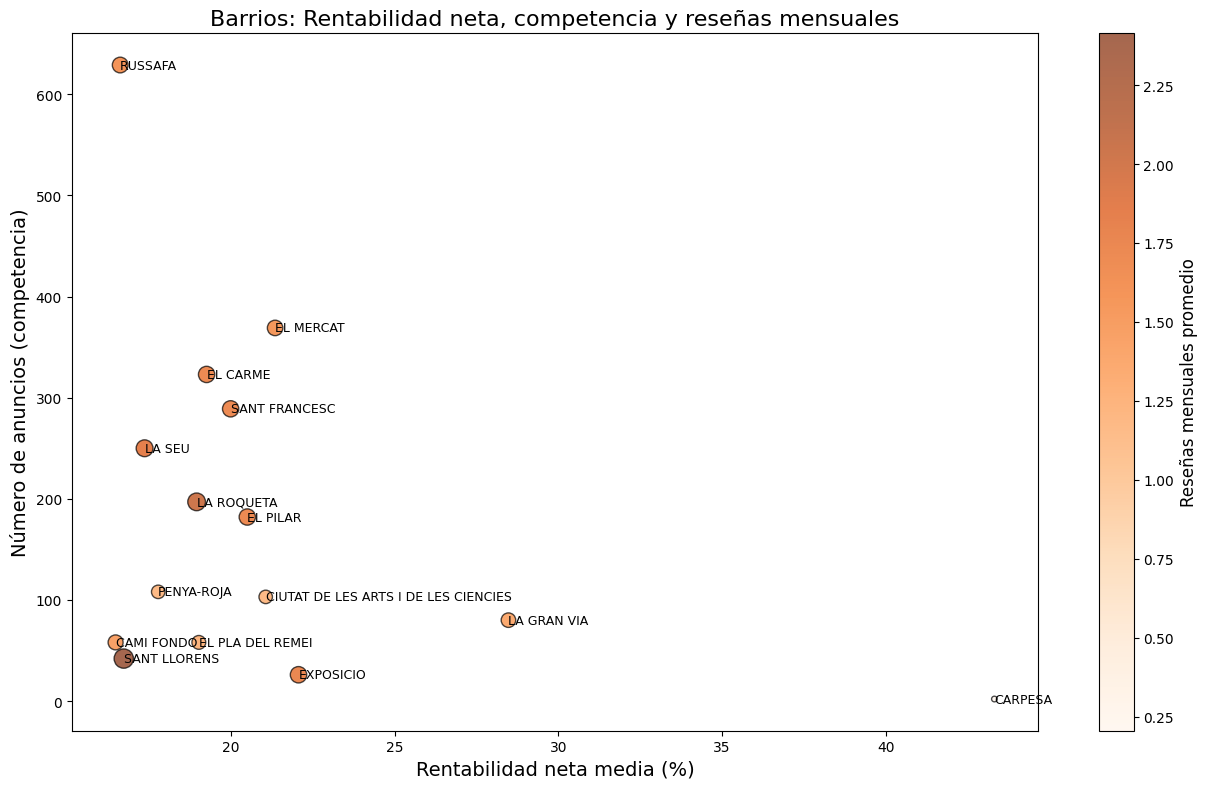

In [ ]:
plt.figure(figsize=(13, 8))
scatter = plt.scatter(
    comparacion['Net ROI (%)'],
    comparacion['n_anuncios'],
    s=comparacion['reviews_per_month'] * 80,  # tamaño de burbuja
    c=comparacion['reviews_per_month'],
    cmap='Oranges',
    alpha=0.7,
    edgecolor='k'
)
for i, row in comparacion.iterrows():
    plt.text(row['Net ROI (%)'], row['n_anuncios'], row['neighbourhood'], fontsize=9, va='center', ha='left')

plt.xlabel('Rentabilidad neta media (%)', fontsize=14)
plt.ylabel('Número de anuncios (competencia)', fontsize=14)
plt.title('Barrios: Rentabilidad neta, competencia y reseñas mensuales', fontsize=16)
cbar = plt.colorbar(scatter)
cbar.set_label('Reseñas mensuales promedio', fontsize=12)
plt.tight_layout()
plt.show()


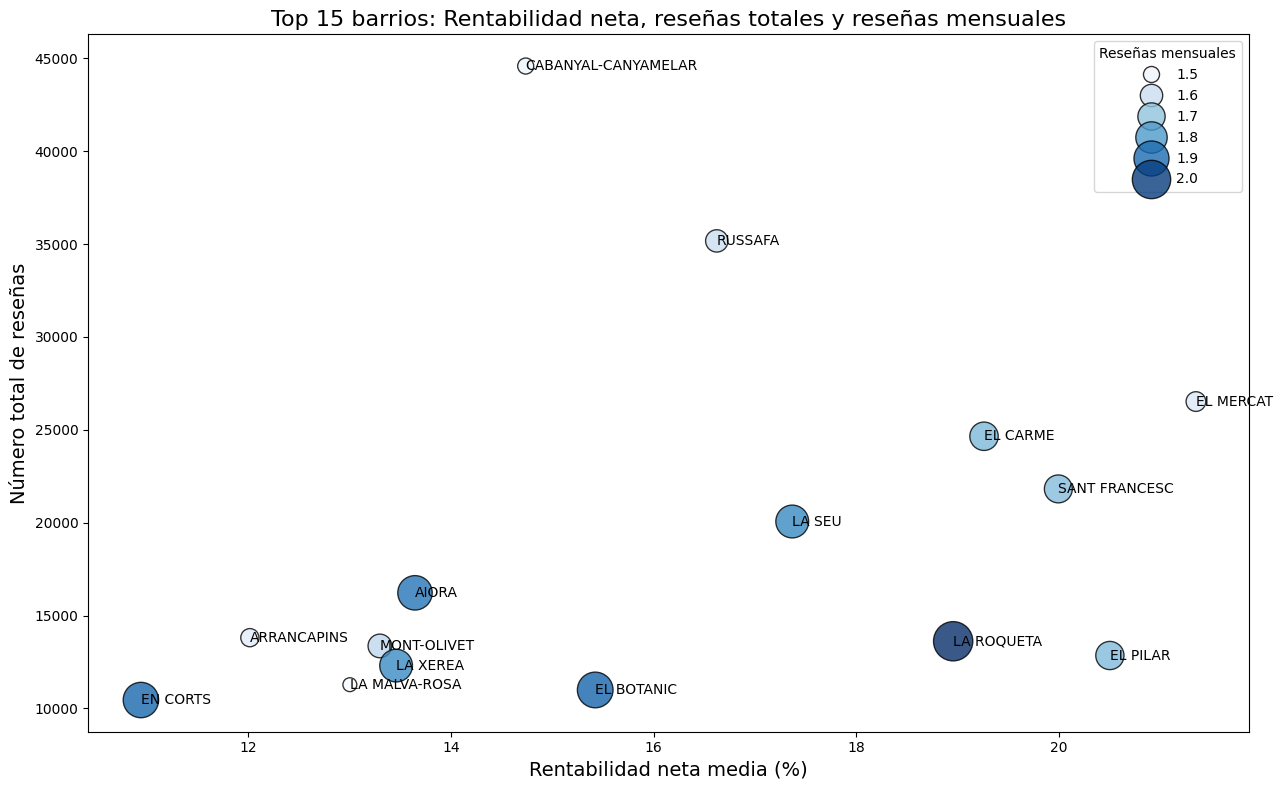

In [ ]:
# Seleccionar los 15 barrios con más reseñas
top_barrio_plot = barrio_plot.sort_values(by='number_of_reviews', ascending=False).head(15)

plt.figure(figsize=(13, 8))
scatter = sns.scatterplot(
    data=top_barrio_plot,
    x='Net ROI (%)',
    y='number_of_reviews',
    size='reviews_per_month',
    hue='reviews_per_month',
    palette='Blues',
    sizes=(100, 800),
    legend='brief',
    alpha=0.8,
    edgecolor='k'
)

# Etiquetas para cada punto
for i, row in top_barrio_plot.iterrows():
    plt.text(row['Net ROI (%)'], row['number_of_reviews'], row['neighbourhood'],
             fontsize=10, va='center', ha='left')

plt.xlabel('Rentabilidad neta media (%)', fontsize=14)
plt.ylabel('Número total de reseñas', fontsize=14)
plt.title('Top 15 barrios: Rentabilidad neta, reseñas totales y reseñas mensuales', fontsize=16)
plt.legend(title='Reseñas mensuales', loc='best')
plt.tight_layout()
plt.show()

   neighbourhood_cleansed  reviews_per_month  Net ROI (%)  relacion_resenas
3          SANT MARCEL.LI           2.090889     3.786873          0.552141
35              CAMI REAL           1.477391     2.994425          0.493381
2            LA FONTSANTA           2.362000     6.876422          0.343493
42              EL PALMAR           1.380000     4.313385          0.319934
26                BORBOTO           1.580000     5.782604          0.273233
11                 FAVARA           1.751000     6.621726          0.264433
62              BENIFERRI           1.173333     4.734141          0.247845
55                LA LLUM           1.232857     5.153638          0.239221
16             EL CALVARI           1.701111     7.315712          0.232528
20      L'HORT DE SENABRE           1.679683     7.424394          0.226238
40           TRES FORQUES           1.402162     6.225972          0.225212
4                NATZARET           2.029474     9.920394          0.204576
19          

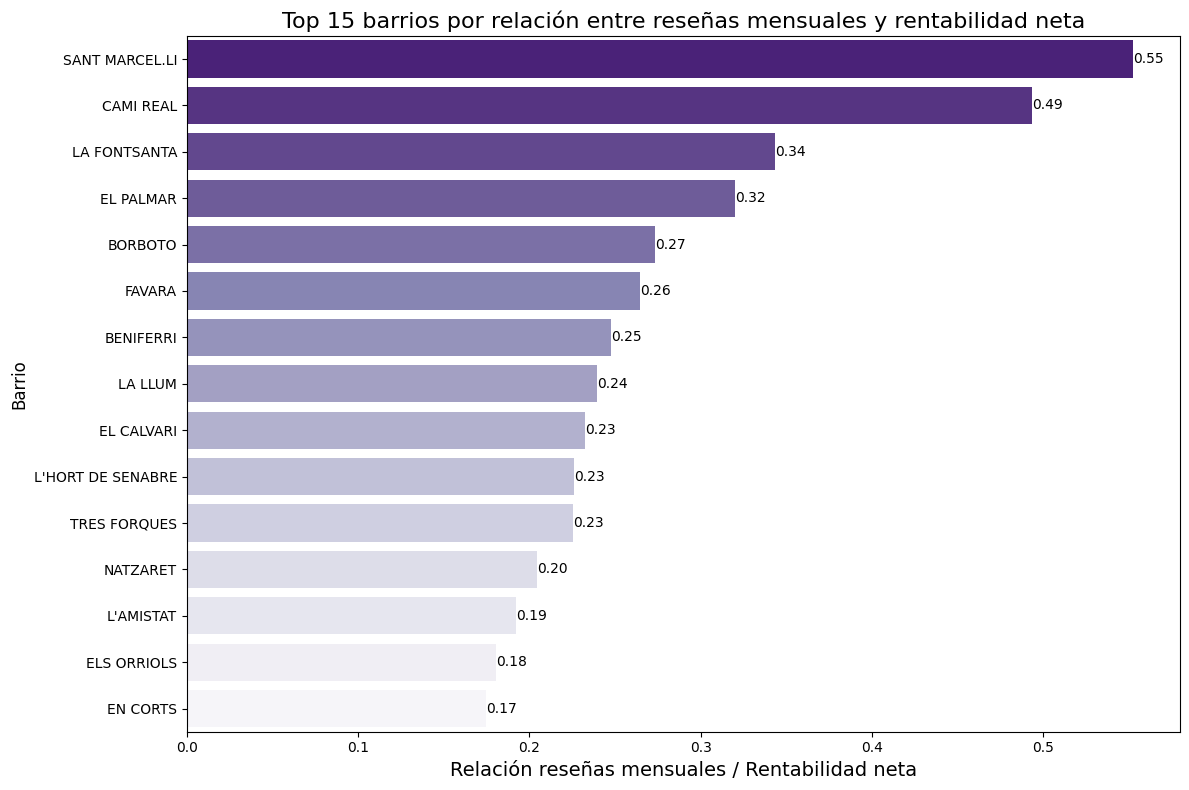

In [ ]:
#calcular barrio con mejor relación entre reseñas mensuales y rentabilidad neta
barrio_relacion_resenas = barrio_reviews_per_month.merge(barrio_rentabilidad_neta, on='neighbourhood', how='left')
barrio_relacion_resenas['relacion_resenas'] = barrio_relacion_resenas['reviews_per_month'] / barrio_relacion_resenas['Net ROI (%)']
barrio_relacion_resenas = barrio_relacion_resenas.sort_values(by='relacion_resenas', ascending=False)
print(barrio_relacion_resenas.head(15))
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_relacion_resenas['neighbourhood'].head(15),
    x=barrio_relacion_resenas['relacion_resenas'].head(15),
    palette='Purples_r'
)   
plt.title("Top 15 barrios por relación entre reseñas mensuales y rentabilidad neta", fontsize=16)
plt.xlabel("Relación reseñas mensuales / Rentabilidad neta", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.show()

In [ ]:
# Calcular el número medio de habitaciones y baños por barrio
barrio_habitaciones_banos = df.groupby('neighbourhood').agg({
    'bedrooms': 'mean',
    'bathrooms': 'mean'
}).reset_index()

# Mostrar los 15 barrios con mayor número medio de habitaciones
barrio_habitaciones_banos = barrio_habitaciones_banos.sort_values(by='bedrooms', ascending=False).head(15)
print(barrio_habitaciones_banos)


   neighbourhood_cleansed  bedrooms  bathrooms
14                CARPESA  3.000000   2.500000
57    MAHUELLA-TAULADELLA  3.000000   3.000000
27          EL PERELLONET  2.553846   1.583613
30               EL SALER  2.138462   1.474219
69                 PINEDO  2.000000   1.267718
10           CAMI DE VERA  1.909091   1.590909
79               SOTERNES  1.904762   1.403801
47          LA MALVA-ROSA  1.893993   1.313273
45            LA GRAN VIA  1.875000   1.558227
83               TRINITAT  1.845361   1.212467
61               MESTALLA  1.837838   1.283126
5              BENIMACLET  1.836538   1.247781
29       EL PLA DEL REMEI  1.827586   1.534483
7                  BETERO  1.784810   1.367207
39         L'ILLA PERDUDA  1.718310   1.262512


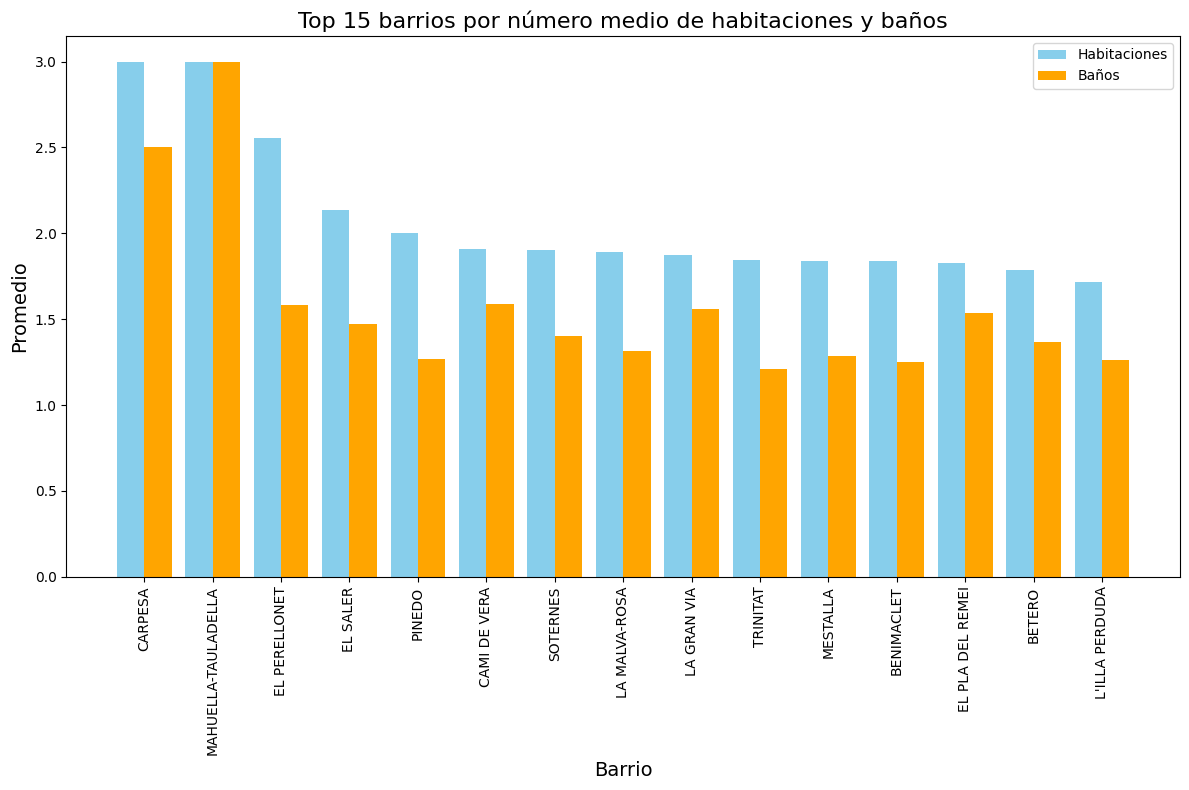

In [ ]:


plt.figure(figsize=(12, 8))
bar_width = 0.4
x = range(len(barrio_habitaciones_banos))

plt.bar(x, barrio_habitaciones_banos['bedrooms'], width=bar_width, label='Habitaciones', color='skyblue')
plt.bar([i + bar_width for i in x], barrio_habitaciones_banos['bathrooms'], width=bar_width, label='Baños', color='orange')

plt.xlabel('Barrio', fontsize=14)
plt.ylabel('Promedio', fontsize=14)
plt.title('Top 15 barrios por número medio de habitaciones y baños', fontsize=16)
plt.xticks([i + bar_width/2 for i in x], barrio_habitaciones_banos['neighbourhood'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Unir los dataframes por barrio
habitaciones_resenas = barrio_habitaciones_banos.merge(
    barrio_mas_resenas[['neighbourhood', 'number_of_reviews']],
    on='neighbourhood',
    how='left'
)

# Calcular la correlación
correlacion = habitaciones_resenas['bedrooms'].corr(habitaciones_resenas['number_of_reviews'])
print(f"Correlación entre número medio de habitaciones y número de reseñas: {correlacion:.2f}")


Correlación entre número medio de habitaciones y número de reseñas: -0.35


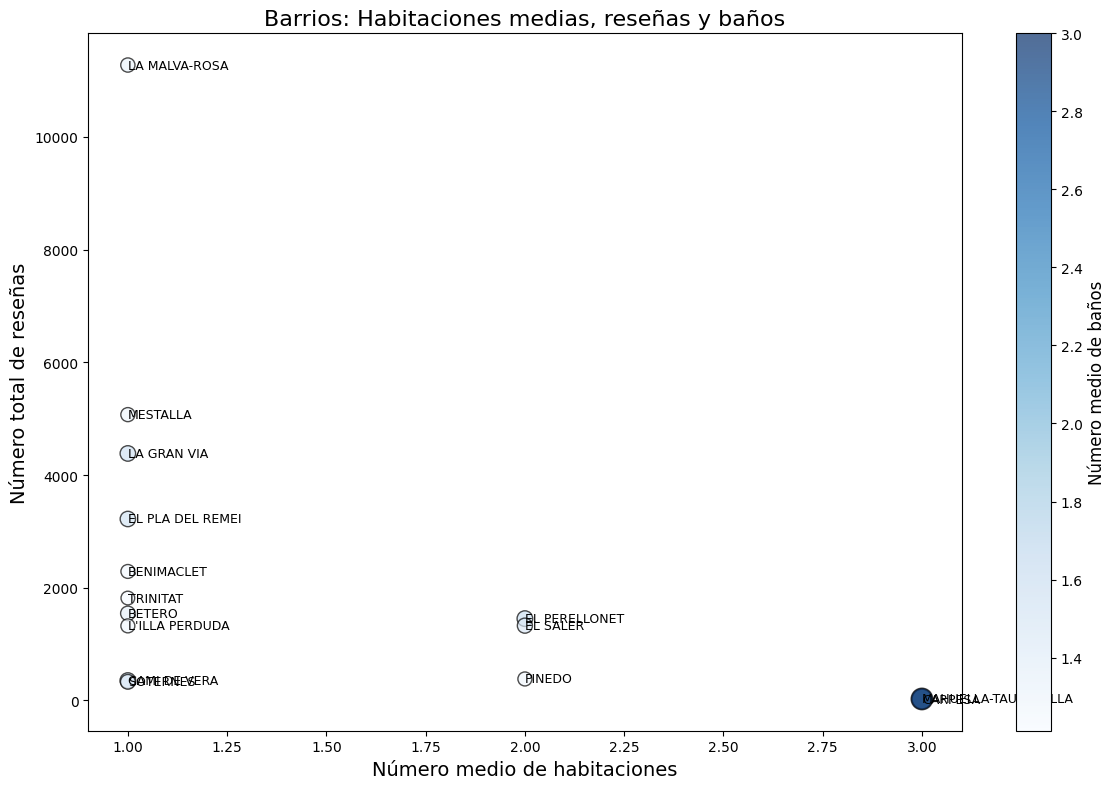

In [ ]:
plt.figure(figsize=(12, 8))
ax = plt.scatter(
    habitaciones_resenas['bedrooms'].astype(int),
    habitaciones_resenas['number_of_reviews'],
    s=habitaciones_resenas['bathrooms'] * 80,  # tamaño de burbuja según baños
    c=habitaciones_resenas['bathrooms'],
    cmap='Blues',
    alpha=0.7,
    edgecolor='k'
)
for i, row in habitaciones_resenas.iterrows():
    plt.text(int(row['bedrooms']), row['number_of_reviews'], row['neighbourhood'], fontsize=9, va='center', ha='left')

plt.xlabel('Número medio de habitaciones', fontsize=14)
plt.ylabel('Número total de reseñas', fontsize=14)
plt.title('Barrios: Habitaciones medias, reseñas y baños', fontsize=16)
cbar = plt.colorbar()
cbar.set_label('Número medio de baños', fontsize=12)
plt.tight_layout()
plt.show()

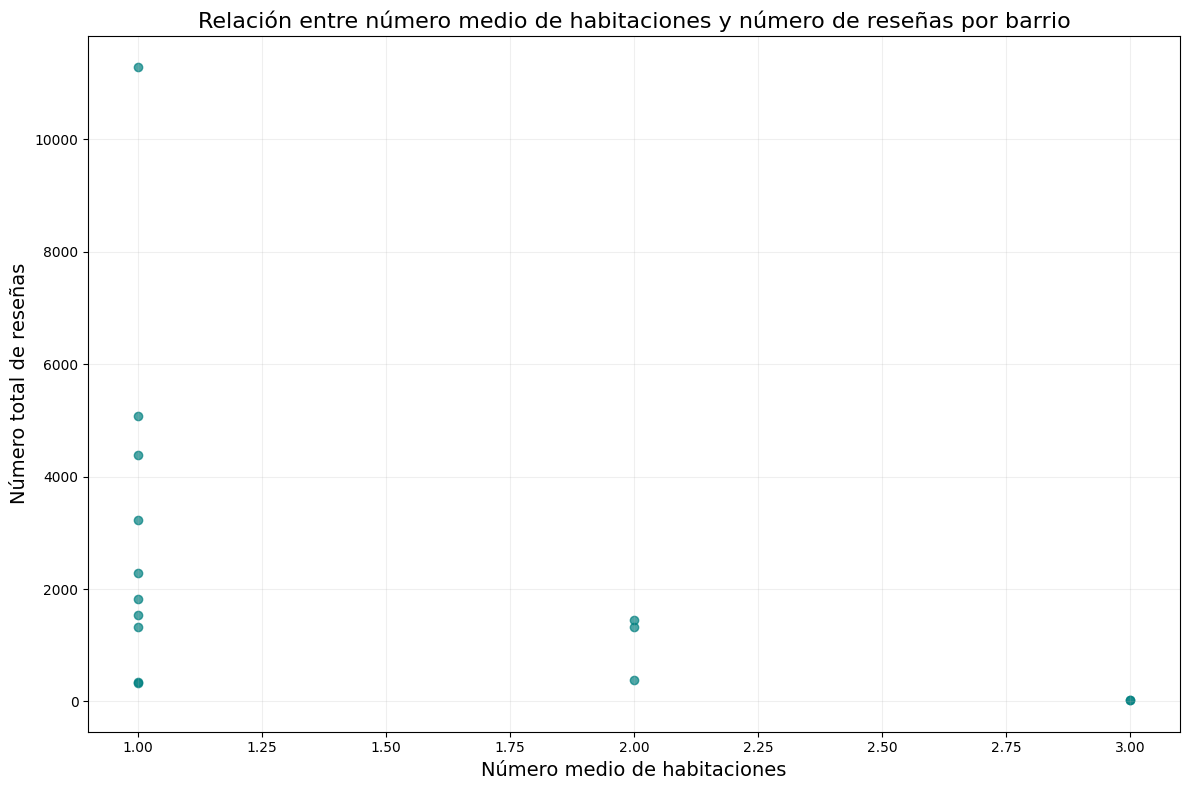

In [80]:
plt.figure(figsize=(12, 8))
plt.scatter(habitaciones_resenas['bedrooms'].astype(int), habitaciones_resenas['number_of_reviews'], color='teal', alpha=0.7)
plt.xlabel('Número medio de habitaciones', fontsize=14)
plt.ylabel('Número total de reseñas', fontsize=14)
plt.title('Relación entre número medio de habitaciones y número de reseñas por barrio', fontsize=16)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


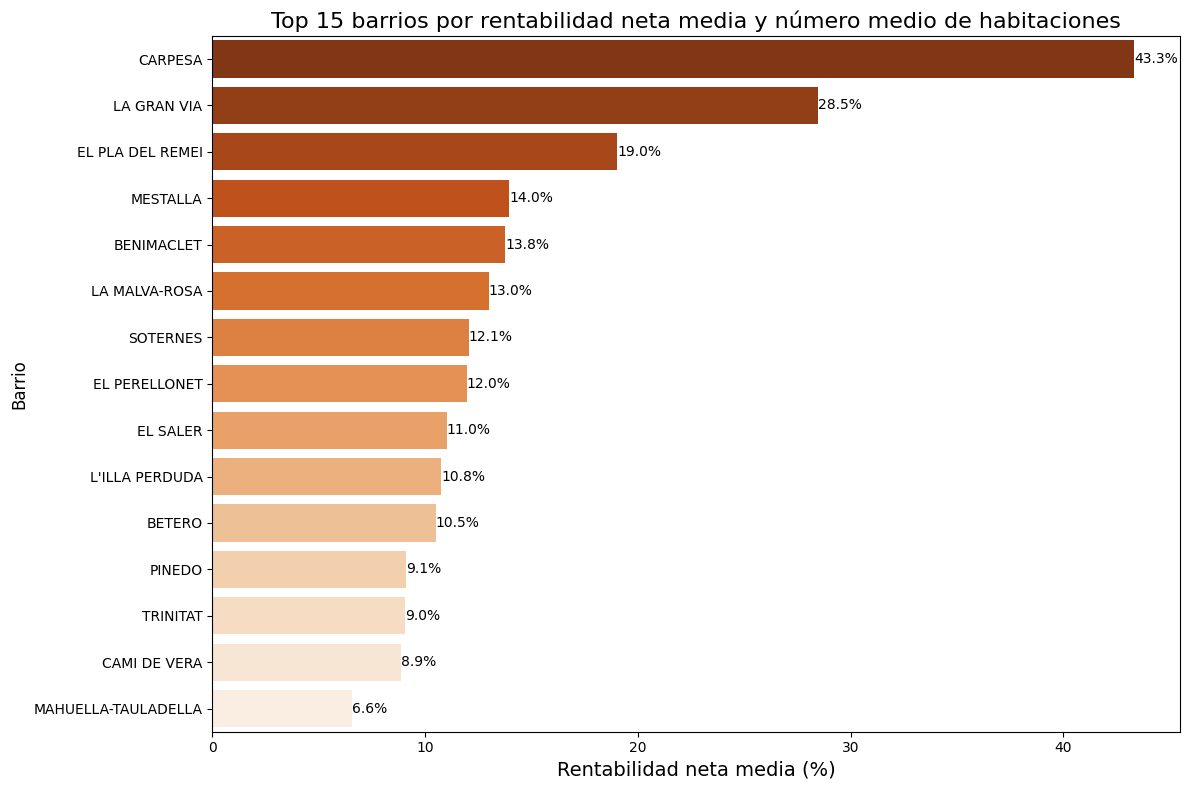

In [ ]:
#comparar numeros de habitaciones con rentabilidad neta
barrio_habitaciones_rentabilidad = barrio_habitaciones_banos.merge(barrio_rentabilidad_neta, on='neighbourhood', how='left')
barrio_habitaciones_rentabilidad = barrio_habitaciones_rentabilidad.sort_values(by='Net ROI (%)', ascending=False).head(15)
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_habitaciones_rentabilidad['neighbourhood'],
    x=barrio_habitaciones_rentabilidad['Net ROI (%)'],
    palette='Oranges_r'
)
plt.title("Top 15 barrios por rentabilidad neta media y número medio de habitaciones", fontsize=16)
plt.xlabel("Rentabilidad neta media (%)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.show()


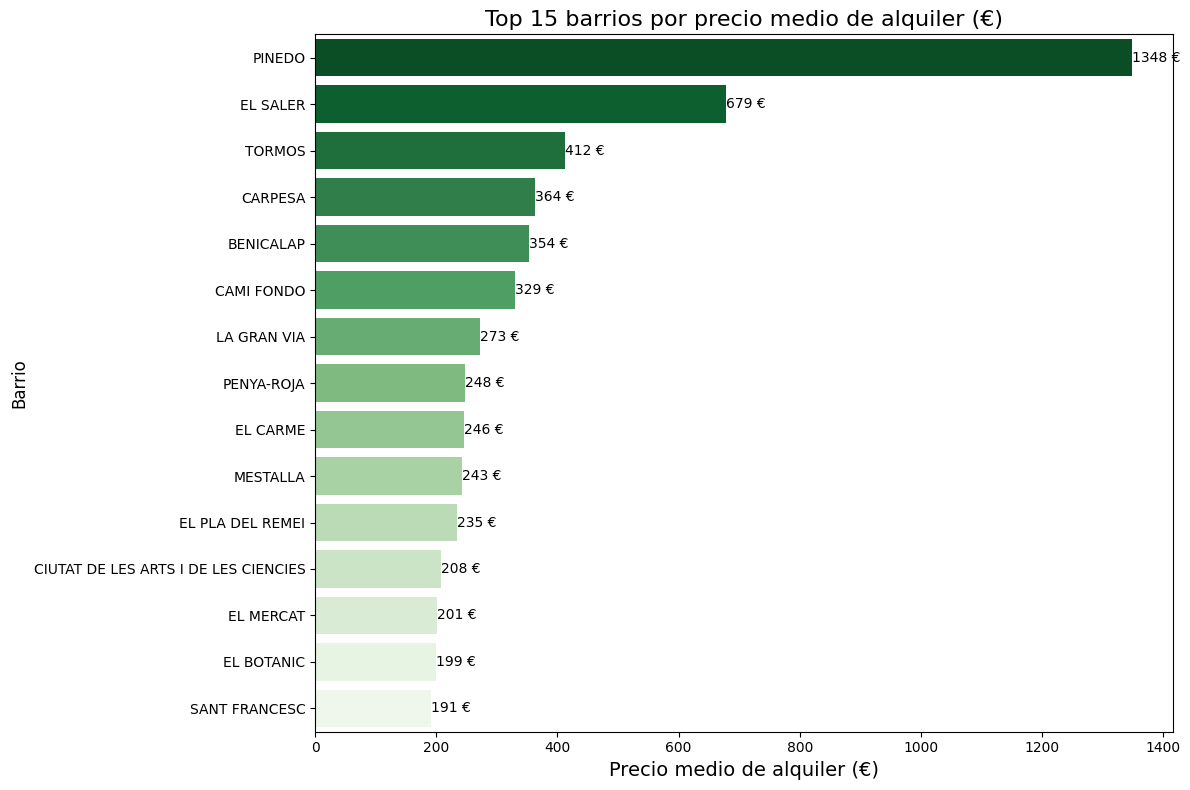

In [ ]:
#comparar barrios con price
barrio_price = df.groupby('neighbourhood')['price'].mean().reset_index()
barrio_price = barrio_price.sort_values(by='price', ascending=False).head(15
)
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_price['neighbourhood'],
    x=barrio_price['price'],
    palette='Greens_r'
)
plt.title("Top 15 barrios por precio medio de alquiler (€)", fontsize=16)
plt.xlabel("Precio medio de alquiler (€)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f €')
plt.show()

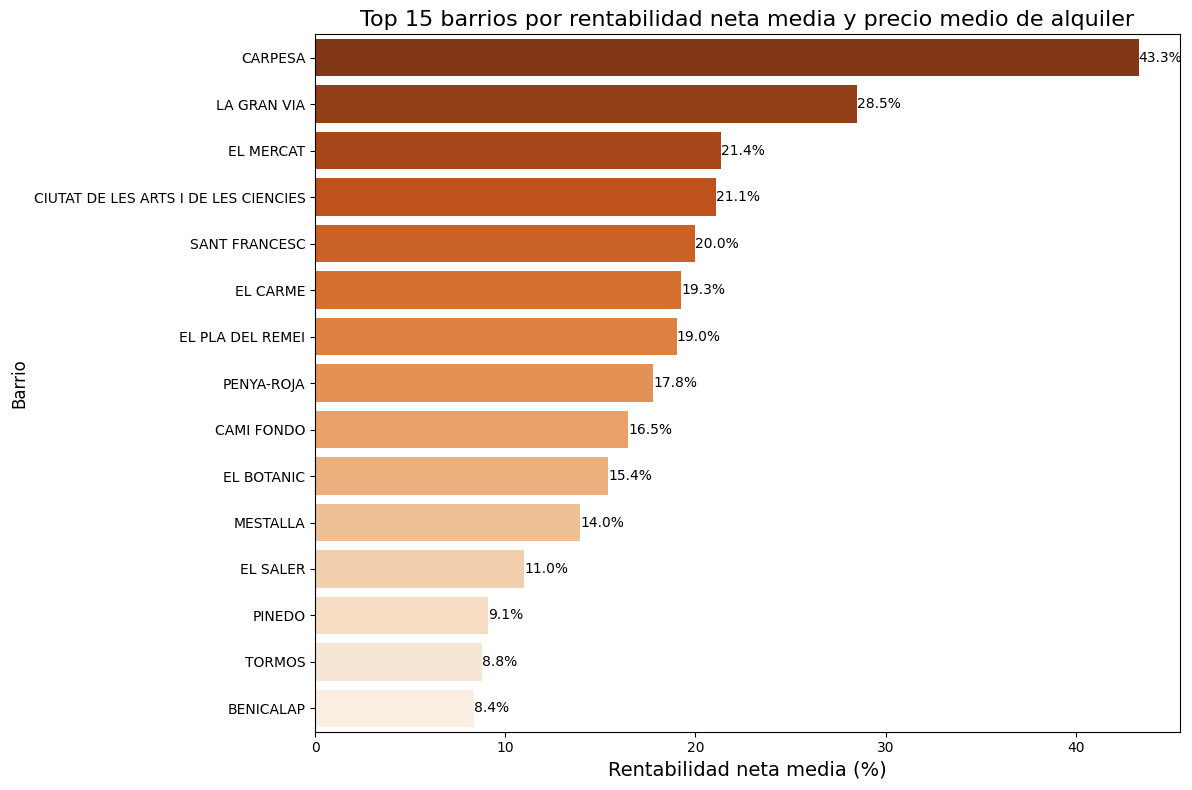

In [ ]:
#comparar precio noche con rentabilidad neta
barrio_price_rentabilidad = barrio_price.merge(barrio_rentabilidad_neta, on='neighbourhood', how='left')
barrio_price_rentabilidad = barrio_price_rentabilidad.sort_values(by='Net ROI (%)', ascending=False).head(15)
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_price_rentabilidad['neighbourhood'],
    x=barrio_price_rentabilidad['Net ROI (%)'],
    palette='Oranges_r'
)
plt.title("Top 15 barrios por rentabilidad neta media y precio medio de alquiler", fontsize=16)
plt.xlabel("Rentabilidad neta media (%)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.show()
# Comparar barrios por precio medio de alquiler y número de anuncios
barrio_price_anuncios = barrio_price.merge(
    competencia_por_barrio[['neighbourhood', 'n_anuncios']],
    on='neighbourhood',
    how='left'
)

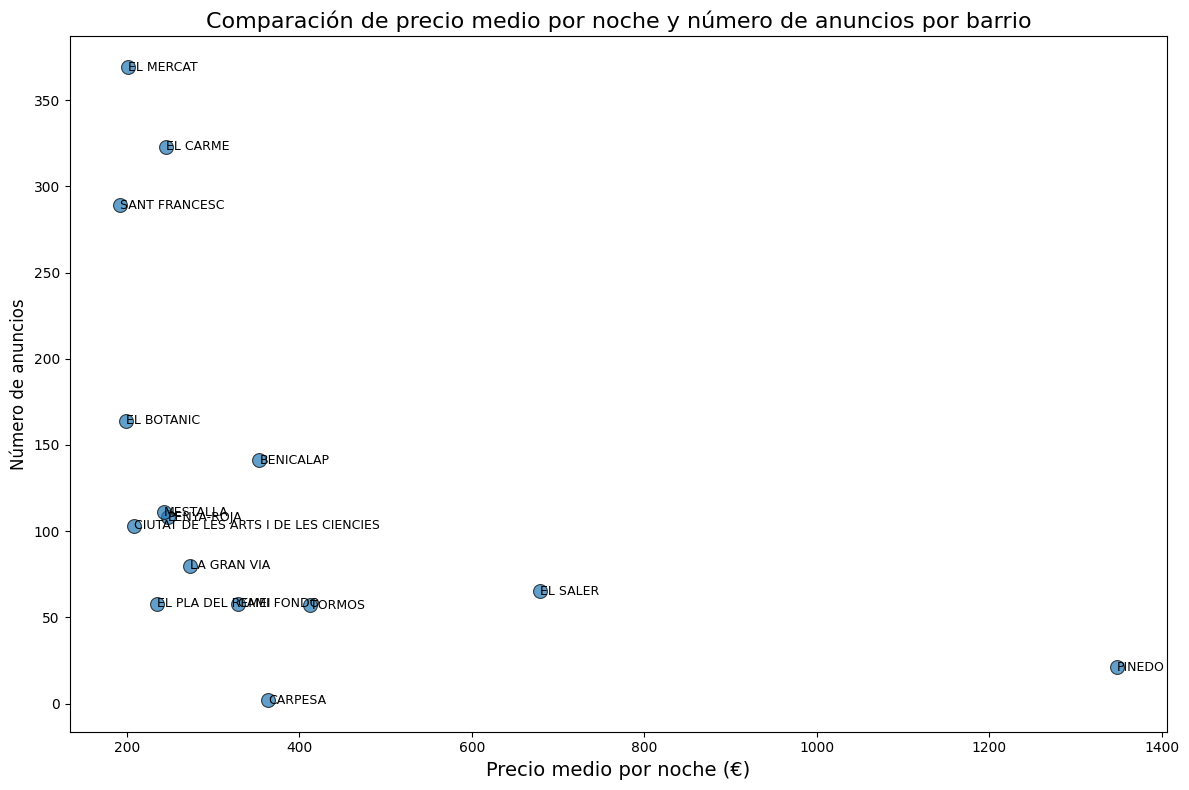

In [88]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    data=barrio_price_anuncios,
    x='price',
    y='n_anuncios',
    s=100,
    alpha=0.7,
    edgecolor='k'
)
plt.title("Comparación de precio medio por noche y número de anuncios por barrio", fontsize=16)
plt.xlabel("Precio medio por noche (€)", fontsize=14)
plt.ylabel("Número de anuncios", fontsize=12)

# Etiquetas de barrio para cada punto
for i, row in barrio_price_anuncios.iterrows():
    plt.text(row['price'], row['n_anuncios'], row['neighbourhood_cleansed'], fontsize=9, va='center', ha='left')

plt.tight_layout()
plt.show()

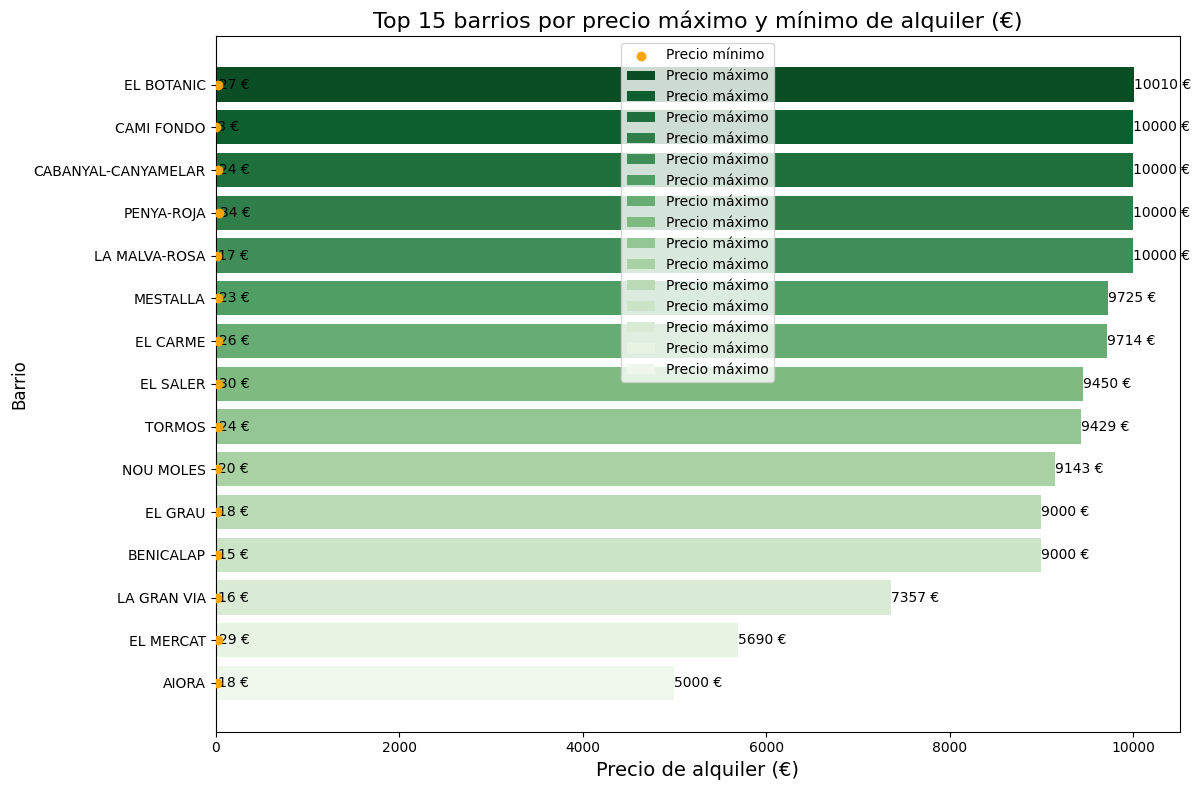

In [ ]:
# Comparativa máximo y mínimo precio por barrio
barrio_price_min_max = df.groupby('neighbourhood')['price'].agg(['min', 'max']).reset_index()
barrio_price_min_max = barrio_price_min_max.sort_values(by='max', ascending=False).head(15)

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_price_min_max['neighbourhood'],
    x=barrio_price_min_max['max'],
    palette='Greens_r',
    label='Precio máximo'
)
plt.scatter(
    barrio_price_min_max['min'],
    barrio_price_min_max['neighbourhood'],
    color='orange',
    label='Precio mínimo',
    zorder=10
)
plt.title("Top 15 barrios por precio máximo y mínimo de alquiler (€)", fontsize=16)
plt.xlabel("Precio de alquiler (€)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f €')

# Añadir etiquetas de precio mínimo en negro al final de la barra
for i, (y, x_min) in enumerate(zip(
    barrio_price_min_max['neighbourhood_cleansed'],
    barrio_price_min_max['min'])):
    label_min = f'{x_min:.0f} €'
    ax.text(x_min + 10, i, label_min, va='center', ha='left', fontsize=10, color='black')

plt.legend()
plt.show()


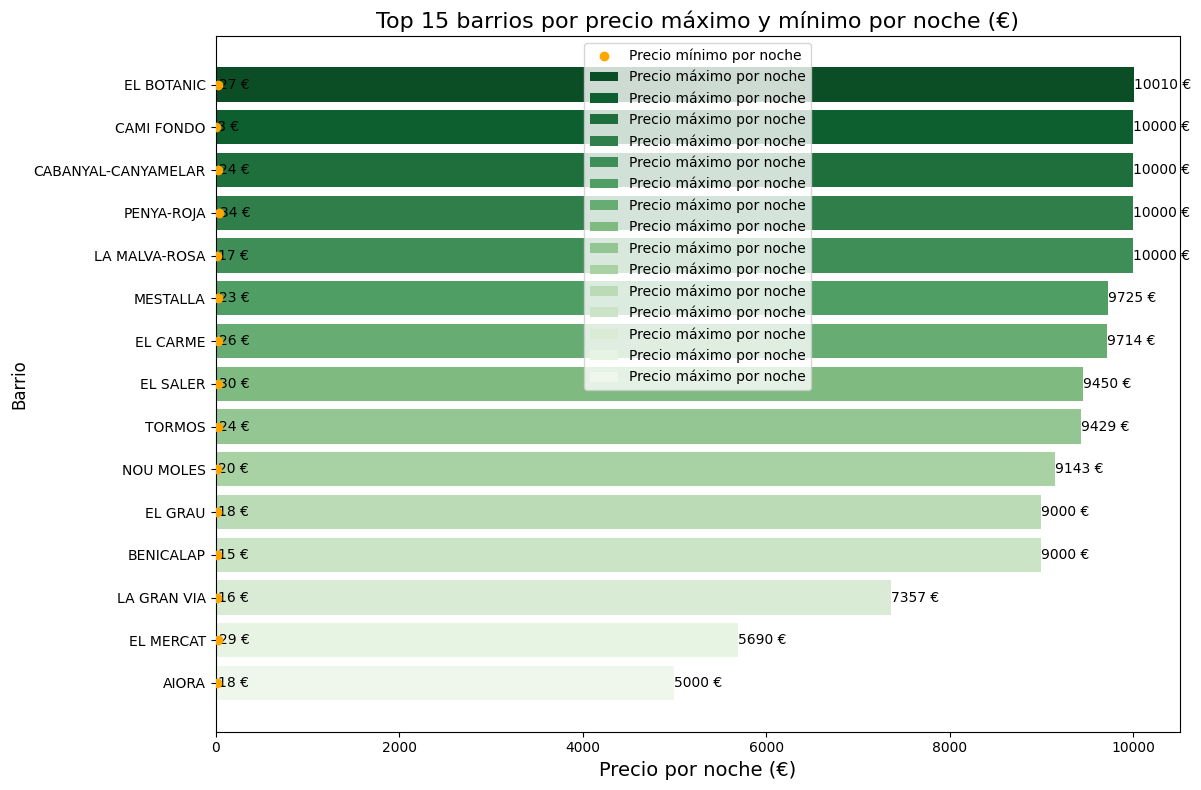

In [ ]:
# Comparativa máximo y mínimo precio por noche por barrio
barrio_price_min_max = df.groupby('neighbourhood')['price'].agg(['min', 'max']).reset_index()
barrio_price_min_max = barrio_price_min_max.sort_values(by='max', ascending=False).head(15)

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y=barrio_price_min_max['neighbourhood'],
    x=barrio_price_min_max['max'],
    palette='Greens_r',
    label='Precio máximo por noche'
)
plt.scatter(
    barrio_price_min_max['min'],
    barrio_price_min_max['neighbourhood'],
    color='orange',
    label='Precio mínimo por noche',
    zorder=10
)
plt.title("Top 15 barrios por precio máximo y mínimo por noche (€)", fontsize=16)
plt.xlabel("Precio por noche (€)", fontsize=14)
plt.ylabel("Barrio", fontsize=12)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f €')

# Añadir etiquetas de precio mínimo en negro al final de la barra
for i, (y, x_min) in enumerate(zip(
    barrio_price_min_max['neighbourhood_cleansed'],
    barrio_price_min_max['min'])):
    label_min = f'{x_min:.0f} €'
    ax.text(x_min + 10, i, label_min, va='center', ha='left', fontsize=10, color='black')

plt.legend()
plt.show()

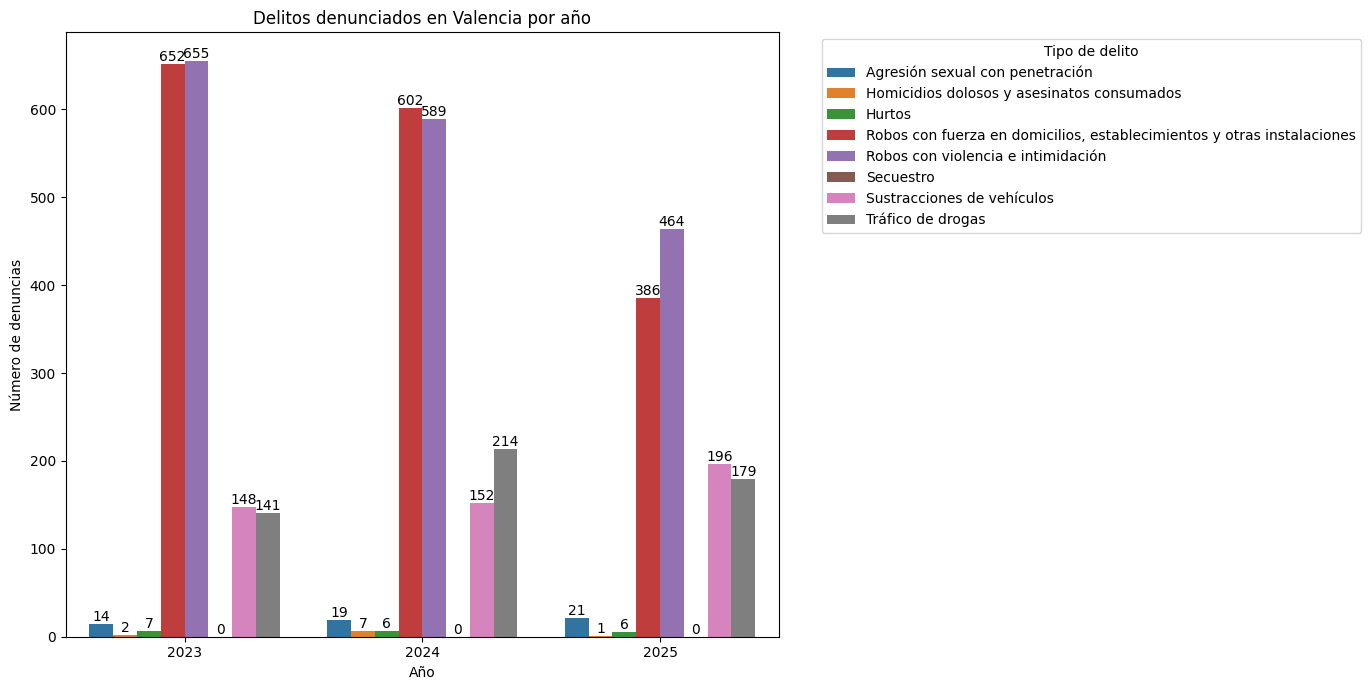

In [103]:
plt.figure(figsize=(14, 7))
# Filtrar filas que no sean 'Total'
df_delincuencia_filtrado = df_delincuencia[df_delincuencia['Parámetro'] != 'Total']

# Crear gráfico de barras agrupadas
ax = sns.barplot(
    data=df_delincuencia_filtrado,
    x='Año',
    y='Denuncias',
    hue='Parámetro'
)
plt.title('Delitos denunciados en Valencia por año')
plt.ylabel('Número de denuncias')
plt.xlabel('Año')
plt.legend(title='Tipo de delito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Añadir etiquetas en cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.show()

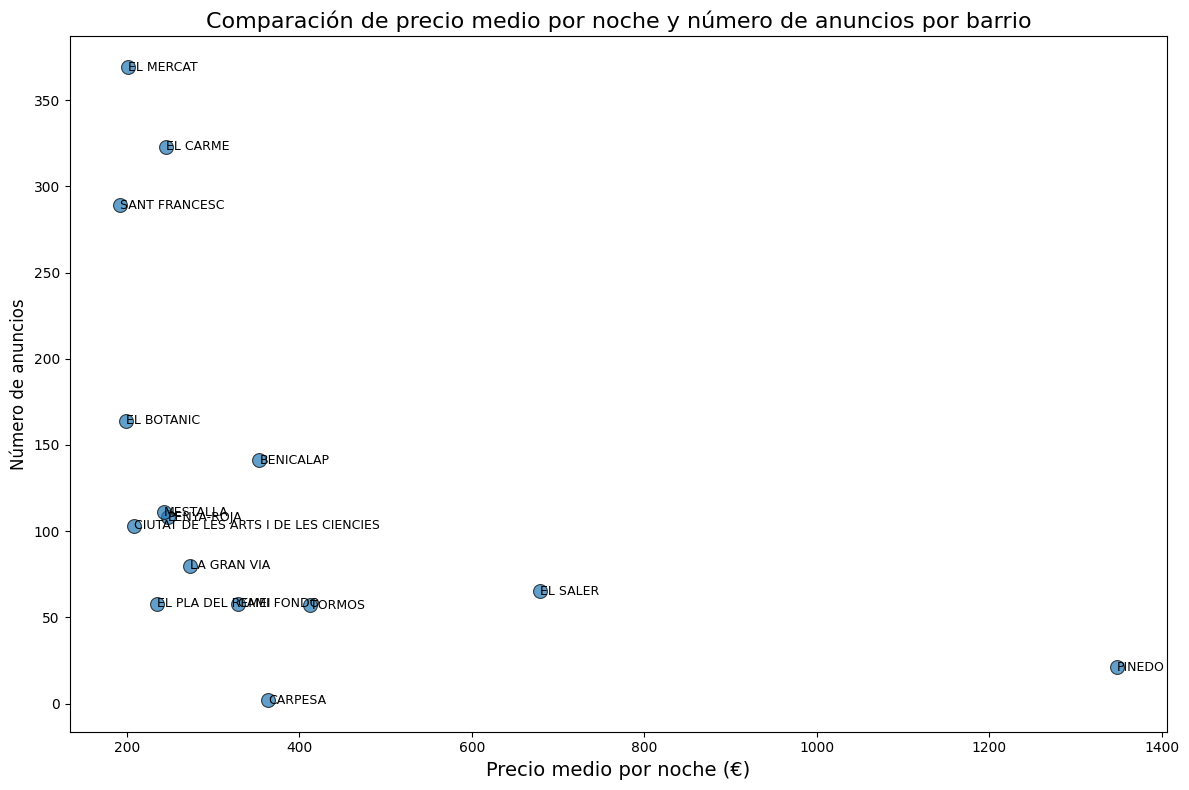

In [ ]:
#comparativa de barrios por precio medio de alquiler y número de anuncios
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    data=barrio_price_anuncios,
    x='price',
    y='n_anuncios',
    s=100,
    alpha=0.7,
    edgecolor='k'
)

plt.title("Comparación de precio medio por noche y número de anuncios por barrio", fontsize=16)
plt.xlabel("Precio medio por noche (€)", fontsize=14)
plt.ylabel("Número de anuncios", fontsize=12)
# Etiquetas de barrio para cada punto
for i, row in barrio_price_anuncios.iterrows():
    plt.text(row['price'], row['n_anuncios'], row['neighbourhood'], fontsize=9, va='center', ha='left')
plt.tight_layout()
plt.show()